# Data visualization in Python (`pyplot`)

## Looking ahead: April, Weeks 1-2

- In April, weeks 1-2, we'll dive deep into **data visualization**.  
  - How do we make visualizations in Python?
  - What principles should we keep in mind?

## Goals of this exercise

- What *is* data visualization and why is it important?
- Introducing `matplotlib`.
- Univariate plot types:
  - **Histograms** (univariate).
  - **Scatterplots** (bivariate).
  - **Bar plots** (bivariate).

## Introduction: data visualization

### What is data visualization?

[Data visualization](https://en.wikipedia.org/wiki/Data_visualization) refers to the process (and result) of representing data graphically.

For our purposes today, we'll be talking mostly about common methods of **plotting** data, including:

- Histograms  
- Scatterplots  
- Line plots
- Bar plots

### Why is data visualization important?

- Exploratory data analysis
- Communicating insights
- Impacting the world

### Exploratory Data Analysis: Checking your assumptions 

[Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

![title](img/anscombe.png)

### Communicating Insights

[Reference: Full Stack Economics](https://fullstackeconomics.com/18-charts-that-explain-the-american-economy/)

![title](img/work.png)

### Impacting the world

[Florence Nightingale](https://en.wikipedia.org/wiki/Florence_Nightingale) (1820-1910) was a social reformer, statistician, and founder of modern nursing.

![title](img/polar.jpeg)

### Impacting the world (pt. 2)

[John Snow](https://en.wikipedia.org/wiki/John_Snow) (1813-1858) was a physician whose visualization of cholera outbreaks helped identify the source and spreading mechanism (water supply). 

![title](img/cholera.jpeg)

## Introducing `matplotlib`

### Loading packages

Here, we load the core packages we'll be using. 

We also add some lines of code that make sure our visualizations will plot "inline" with our code, and that they'll have nice, crisp quality.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### What is `matplotlib`?

> [`matplotlib`](https://matplotlib.org/) is a **plotting library** for Python.

- Many [tutorials](https://matplotlib.org/stable/tutorials/index.html) available online.  
- Also many [examples](https://matplotlib.org/stable/gallery/index) of `matplotlib` in use.

Note that [`seaborn`](https://seaborn.pydata.org/) (which we'll cover soon) uses `matplotlib` "under the hood".

### What is `pyplot`?

> [`pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) is a collection of functions *within* `matplotlib` that make it really easy to plot data.

With `pyplot`, we can easily plot things like:

- Histograms (`plt.hist`)
- Scatterplots (`plt.scatter`)
- Line plots (`plt.plot`) 
- Bar plots (`plt.bar`)

### Example dataset

Let's load our familiar Pokemon dataset, which can be found in `data/pokemon.csv`.

In [ ]:
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## Histograms

### What are histograms?

> A **histogram** is a visualization of a single continuous, quantitative variable (e.g., income or temperature). 

- Histograms are useful for looking at how a variable **distributes**.  
- Can be used to determine whether a distribution is **normal**, **skewed**, or **bimodal**.

A histogram is a **univariate** plot, i.e., it displays only a single variable.

### Histograms in `matplotlib`

To create a histogram, call `plt.hist` with a **single column** of a `DataFrame` (or a `numpy.ndarray`).

**Check-in**: What is this graph telling us?

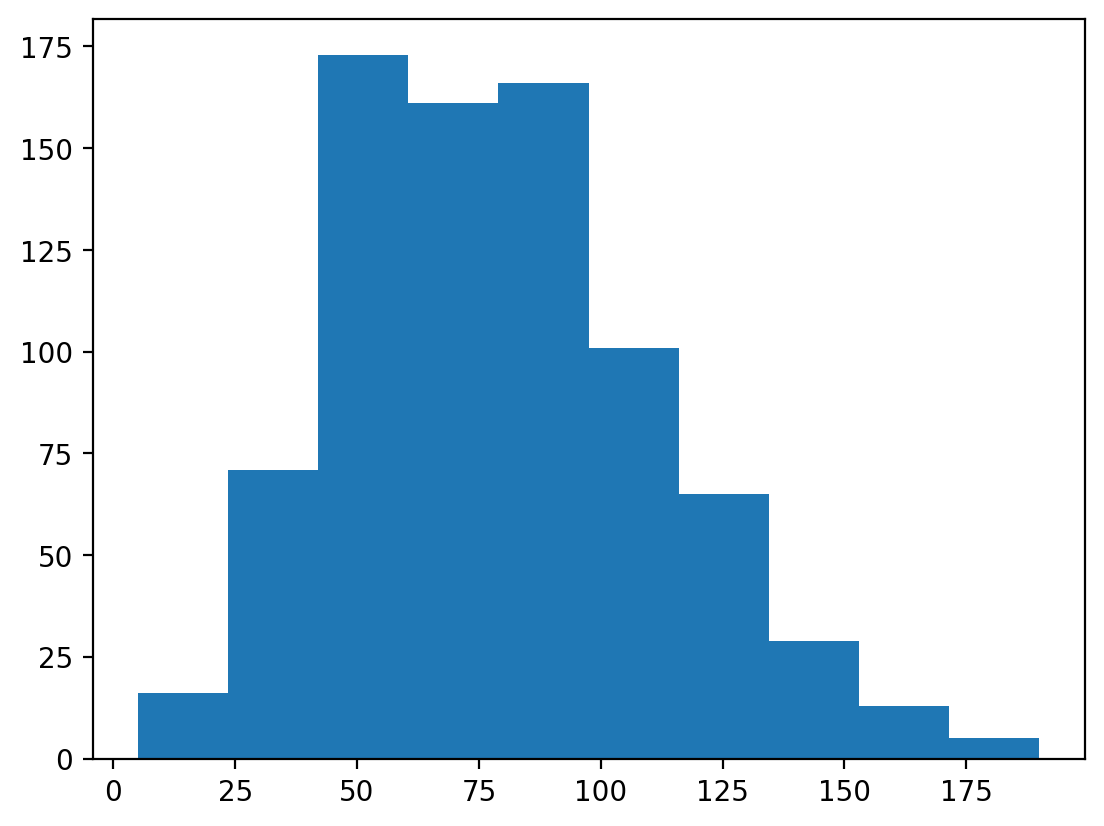

In [ ]:
p = plt.hist(df_pokemon['Attack'])

#histograms show how often some values are occuring in dataset, in this example how pokemon attack statistic is distributed
#we see that most of pokemons have atk stat between 50 and 100, and very few of them less than 25 and even less have more than 175

#### Changing the number of bins

A histogram puts your continuous data into **bins** (e.g., 1-10, 11-20, etc.).

- The height of each bin reflects the number of observations within that interval.  
- Increasing or decreasing the number of bins gives you more or less granularity in your distribution.

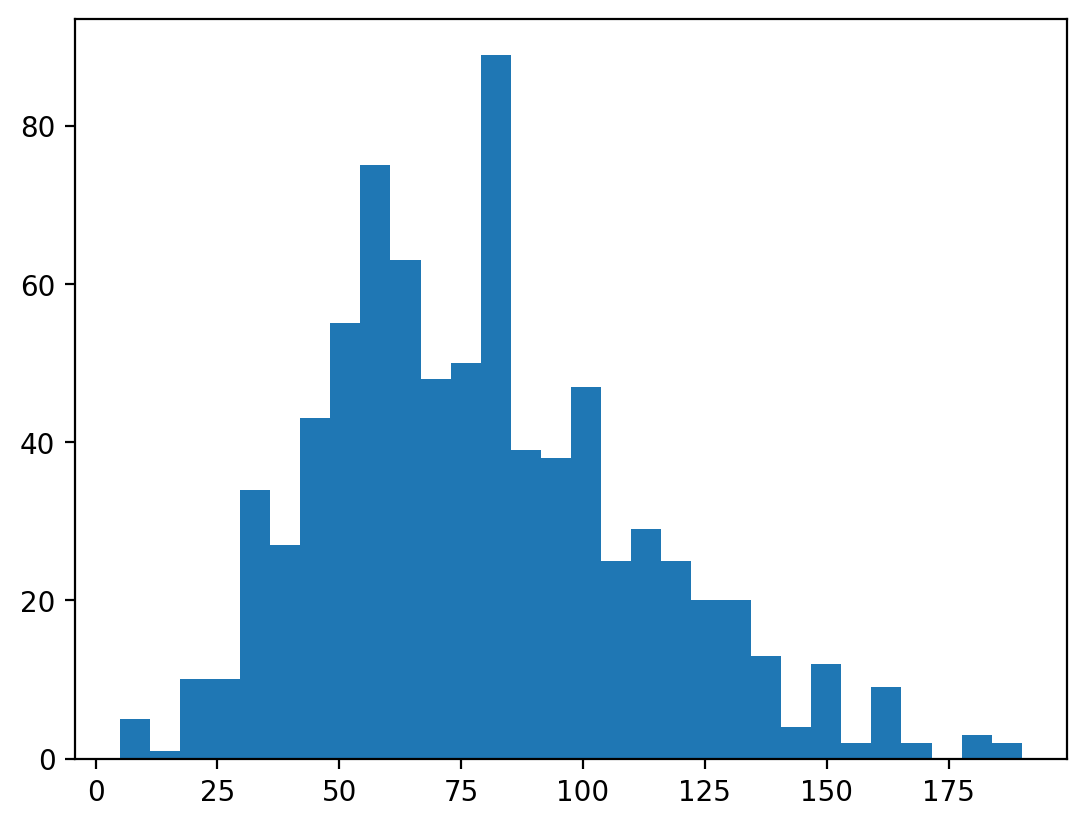

In [ ]:
### This has lots of bins
p = plt.hist(df_pokemon['Attack'], bins = 30)

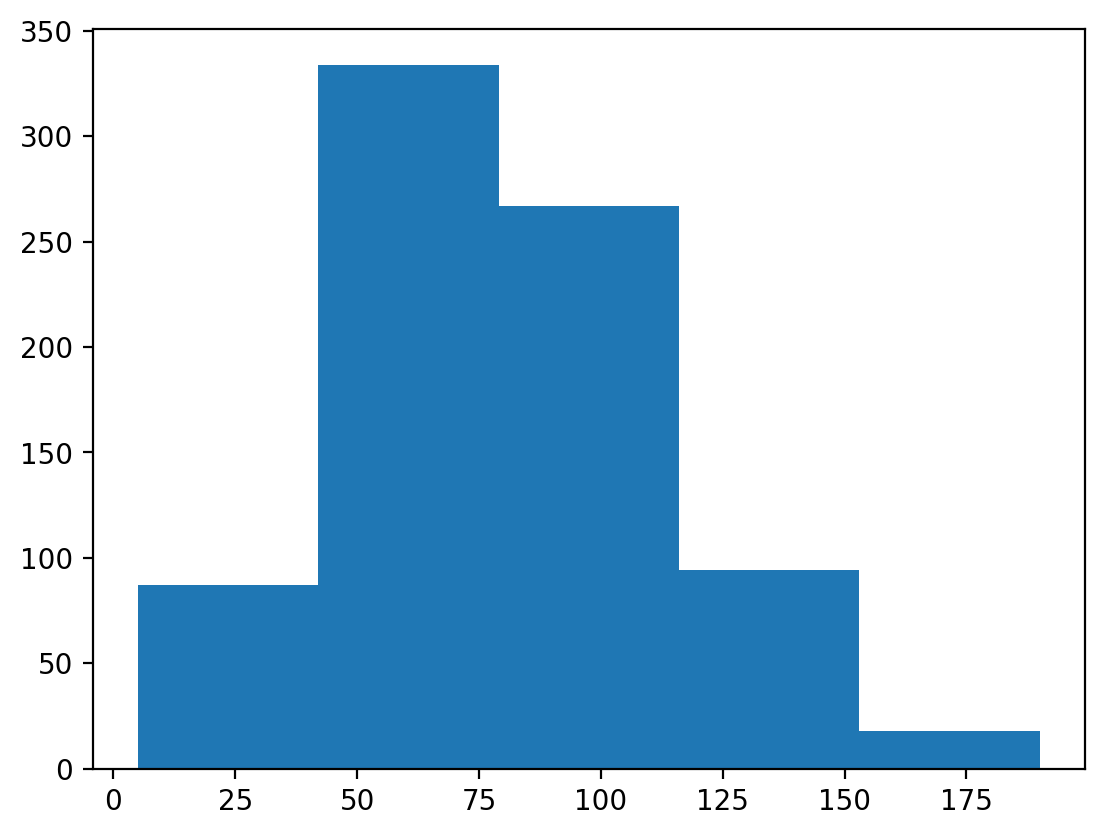

In [ ]:
### This has fewer bins
p = plt.hist(df_pokemon['Attack'], bins = 5)

#### Changing the `alpha` level

The `alpha` level changes the **transparency** of your figure.

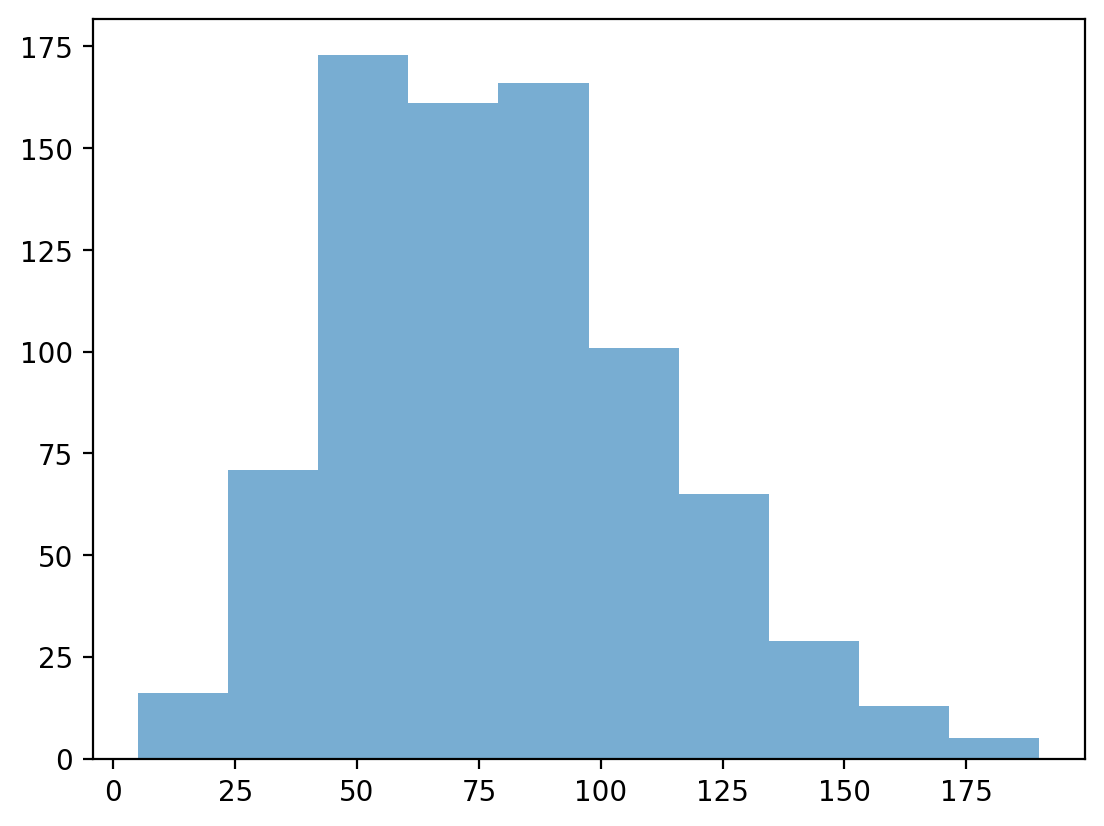

In [ ]:
### This has fewer bins
p = plt.hist(df_pokemon['Attack'], alpha = .6)

#### Check-in:

How would you make a histogram of the scores for `Defense`?

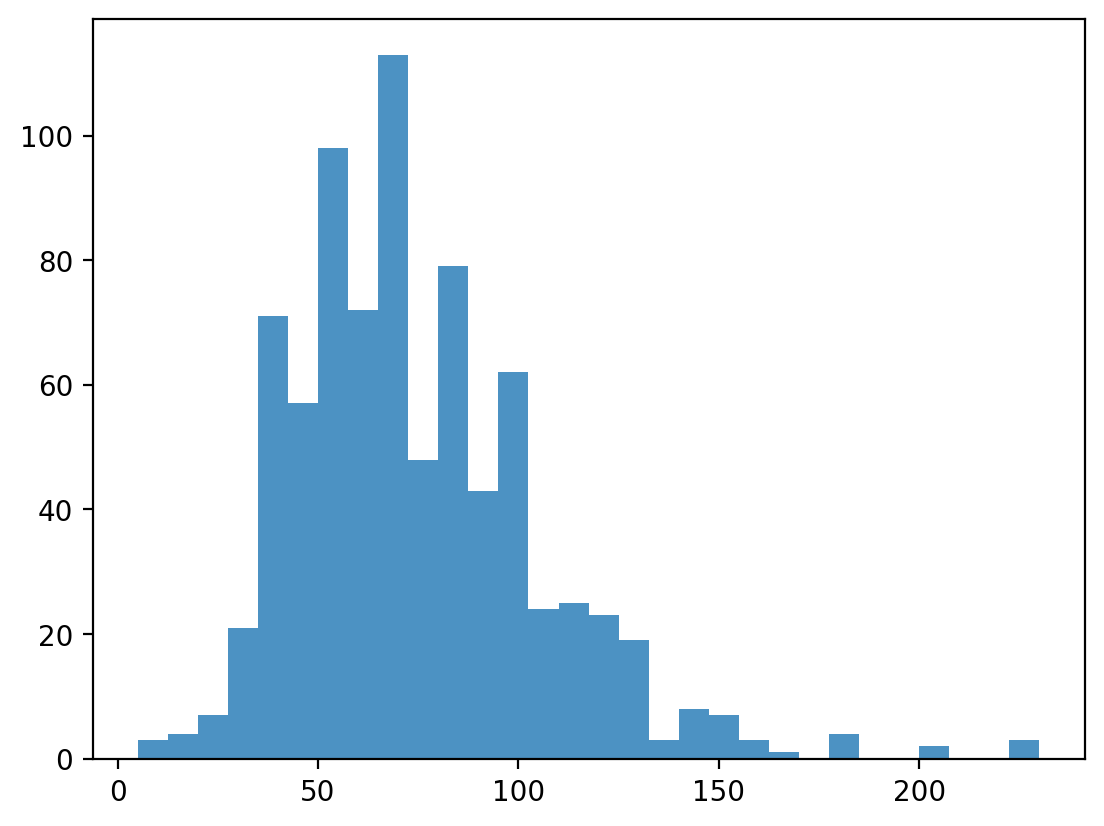

In [ ]:
### Your code here
p = plt.hist(df_pokemon['Defense'], bins = 30, alpha = 0.8)

#### Check-in:

Could you make a histogram of the scores for `Type 1`?

<Axes: xlabel='Type 1'>

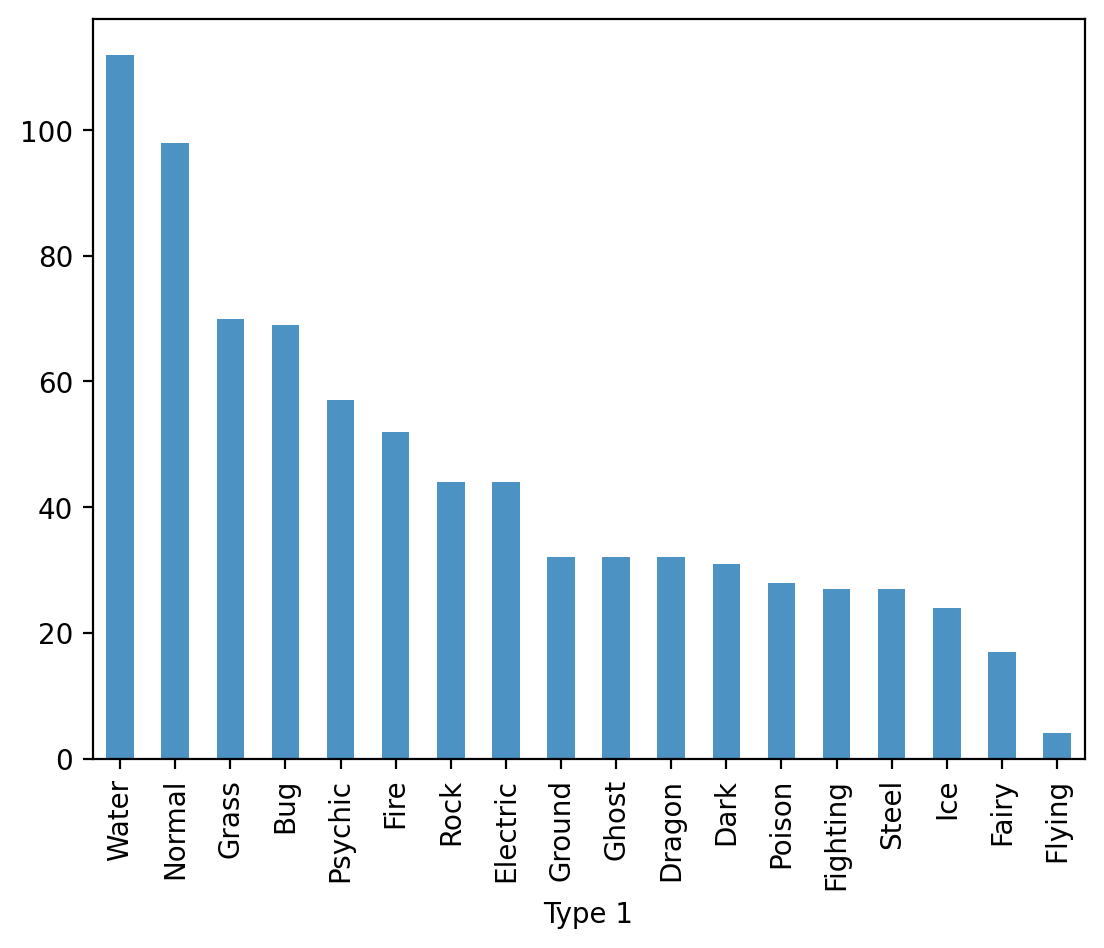

In [ ]:
### Your code here
#get counts of each type and do barplot of it
df_pokemon['Type 1'].value_counts().plot(kind='bar', alpha=0.8)

### Learning from histograms

Histograms are incredibly useful for learning about the **shape** of our distribution. We can ask questions like:

- Is this distribution relatively [normal](https://en.wikipedia.org/wiki/Normal_distribution)?
- Is the distribution [skewed](https://en.wikipedia.org/wiki/Skewness)?
- Are there [outliers](https://en.wikipedia.org/wiki/Outlier)?

#### Normally distributed data

We can use the `numpy.random.normal` function to create a **normal distribution**, then plot it.

A normal distribution has the following characteristics:

- Classic "bell" shape (**symmetric**).  
- Mean, median, and mode are all identical.

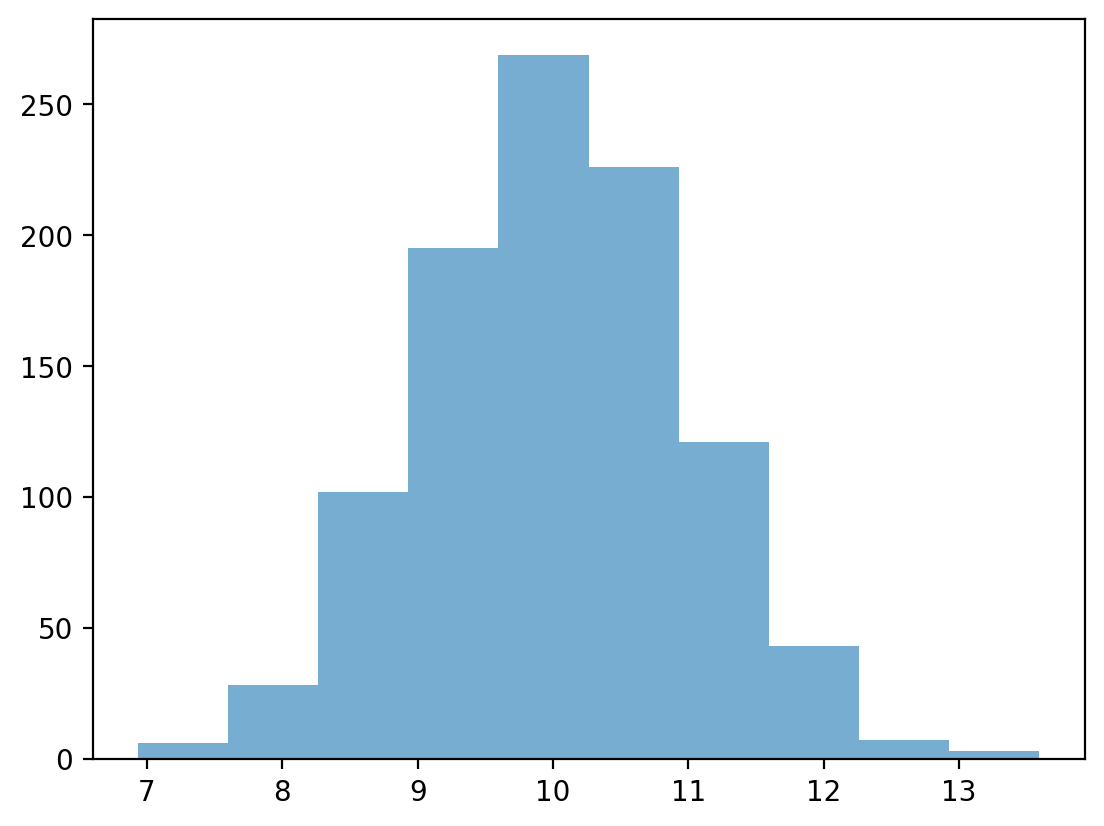

In [ ]:
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
p = plt.hist(norm, alpha = .6)

#### Skewed data

> **Skew** means there are values *elongating* one of the "tails" of a distribution.

- Positive/right skew: the tail is pointing to the right.  
- Negative/left skew: the tail is pointing to the left.

Text(0.5, 1.0, 'Left-skewed')

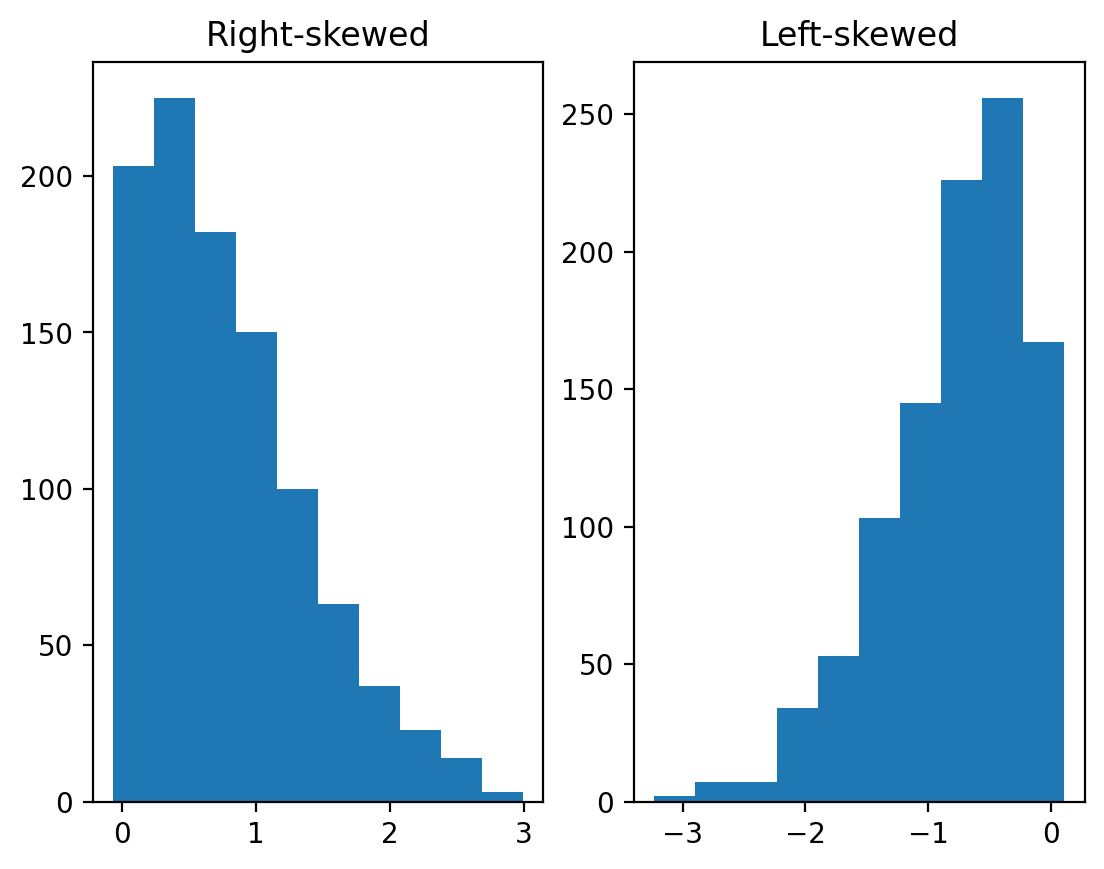

In [ ]:
rskew = ss.skewnorm.rvs(20, size = 1000) # make right-skewed data
lskew = ss.skewnorm.rvs(-20, size = 1000) # make left-skewed data
fig, axes = plt.subplots(1, 2)
axes[0].hist(rskew)
axes[0].set_title("Right-skewed")
axes[1].hist(lskew)
axes[1].set_title("Left-skewed")

#### Outliers

> **Outliers** are data points that differ significantly from other points in a distribution.

- Unlike skewed data, outliers are generally **discontinuous** with the rest of the distribution.
- Next week, we'll talk about more ways to **identify** outliers; for now, we can rely on histograms.

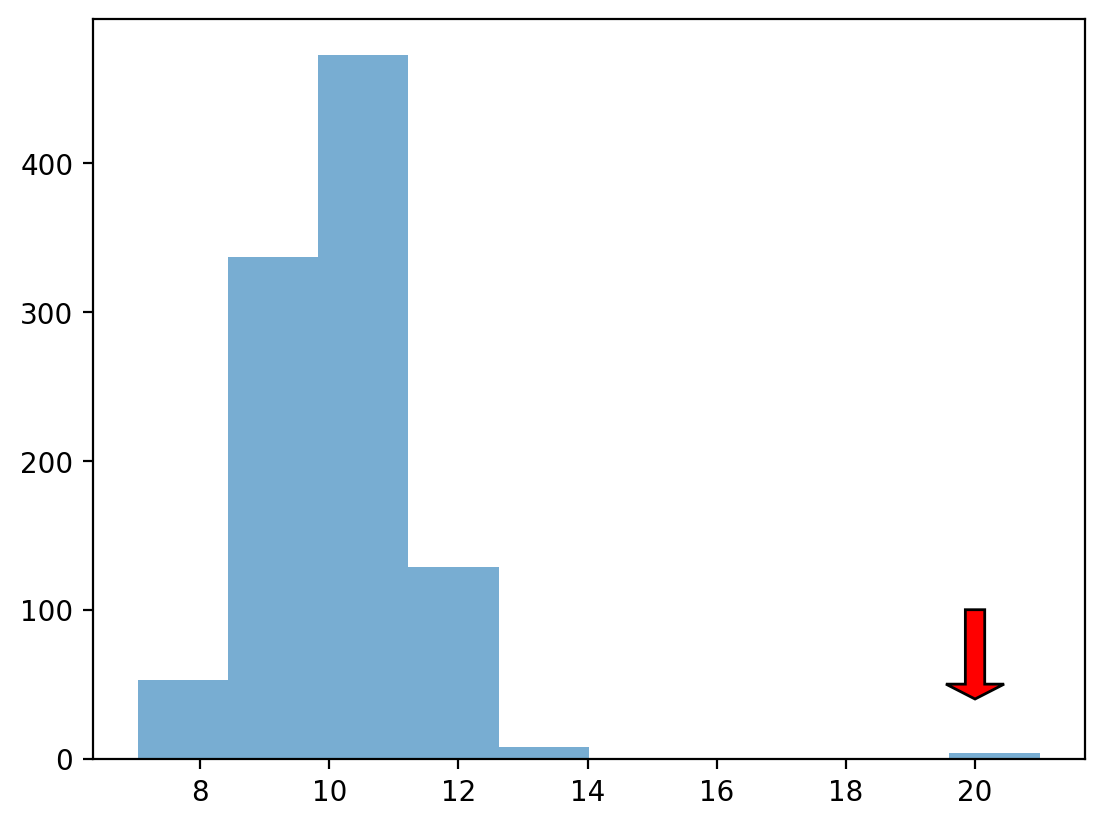

In [ ]:
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
upper_outliers = np.array([21, 21, 21, 21]) ## some random outliers
data = np.concatenate((norm, upper_outliers))
p = plt.hist(data, alpha = .6)
plt.arrow(20, 100, dx = 0, dy = -50, width = .3, head_length = 10, facecolor = "red");

#### Check-in

How would you describe the following distribution?

- Normal vs. skewed?  
- With or without outliers?

In [ ]:
#im guessing we're talking about upper distribution, then it has outlier, there is value 20 much bigger than all of data, and there is no 
# values between 14-20

#distribution is skewed because it doesnt follow normal distribution pattern

#### Check-in

In a somewhat **right-skewed distribution** (like below), what's larger––the `mean` or the `median`?

In [ ]:
mean1=np.mean(data)
median1=np.median(data)
print(mean1)
print(median1)

#mean is slightly bigger, but difference is small

10.154714535915247
10.08105391070858


### Modifying our plot

- A good data visualization should also make it *clear* what's being plotted.
   - Clearly labeled `x` and `y` axes, title.
- Sometimes, we may also want to add **overlays**. 
   - E.g., a dashed vertical line representing the `mean`.

#### Adding axis labels

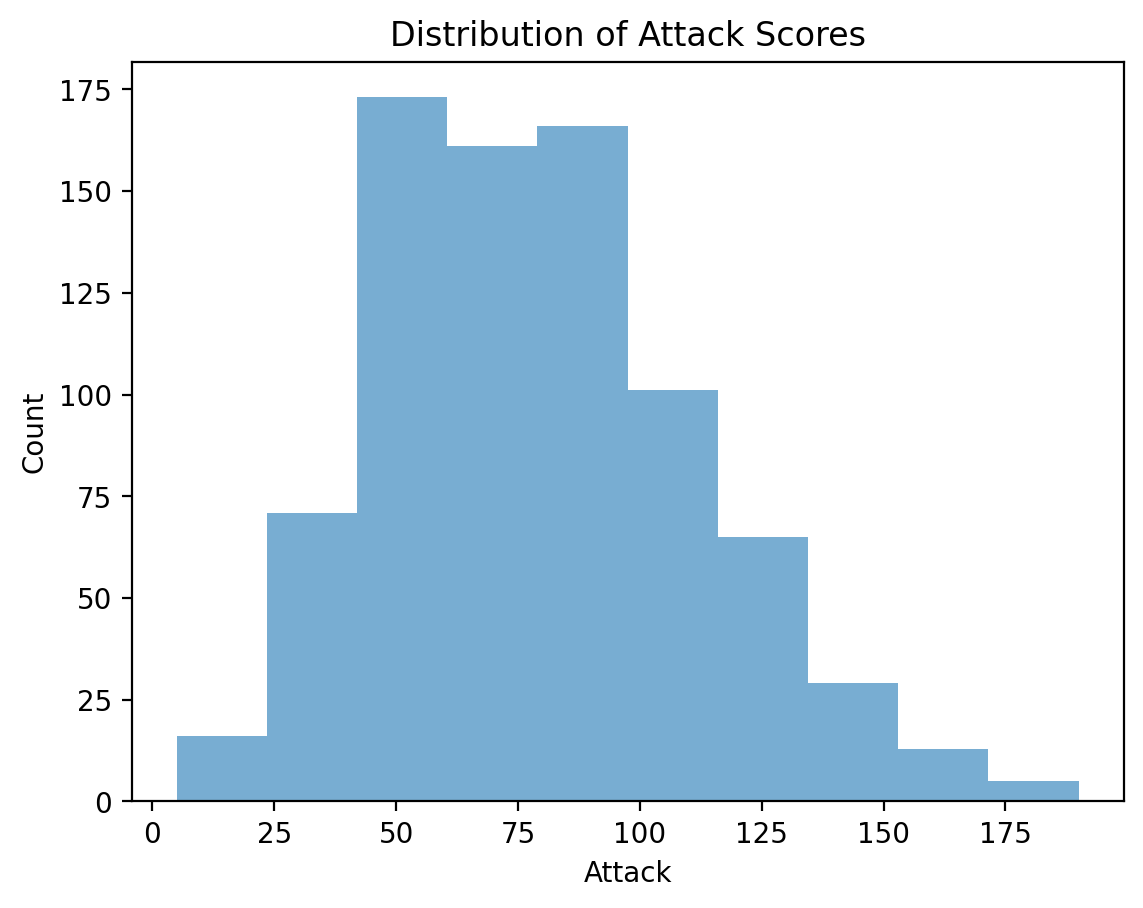

In [ ]:
p = plt.hist(df_pokemon['Attack'], alpha = .6)
plt.xlabel("Attack")
plt.ylabel("Count")
plt.title("Distribution of Attack Scores");

#### Adding a vertical line

The `plt.axvline` function allows us to draw a vertical line at a particular position, e.g., the `mean` of the `Attack` column.

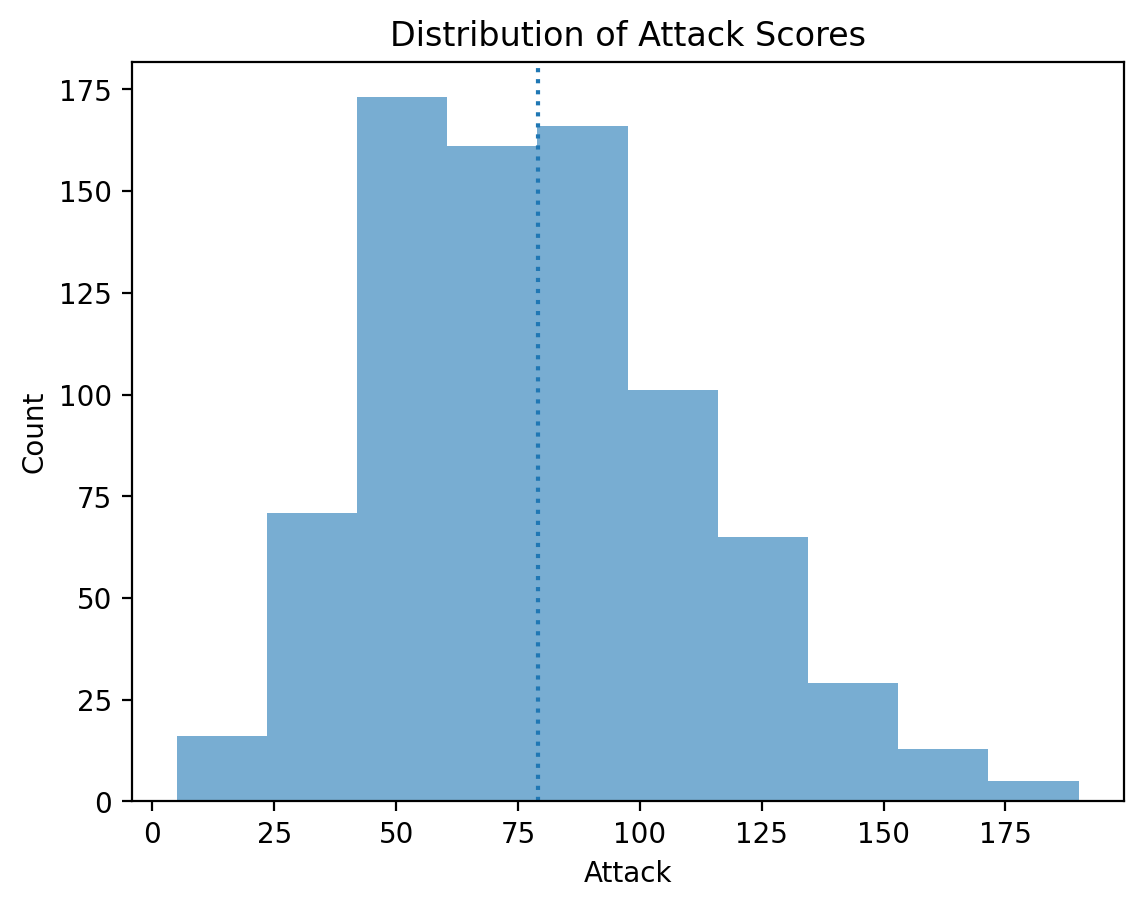

In [ ]:
p = plt.hist(df_pokemon['Attack'], alpha = .6)
plt.xlabel("Attack")
plt.ylabel("Count")
plt.title("Distribution of Attack Scores")
plt.axvline(df_pokemon['Attack'].mean(), linestyle = "dotted");

## Faceting for histograms

Let's try to group by our no. of Attacks by Pokemon Types looking at many histograms at a time:

In [ ]:
import plotly.express as px
fig = px.histogram(df_pokemon,x='Attack', color="Legendary", facet_col='Generation')
fig.show()

## Scatterplots

### What are scatterplots?

> A **scatterplot** is a visualization of how two different continuous distributions relate to each other.

- Each individual point represents an observation.
- Very useful for **exploratory data analysis**.
   - Are these variables positively or negatively correlated?
   
A scatterplot is a **bivariate** plot, i.e., it displays at least two variables.

### Scatterplots with `matplotlib`

We can create a scatterplot using `plt.scatter(x, y)`, where `x` and `y` are the two variables we want to visualize.

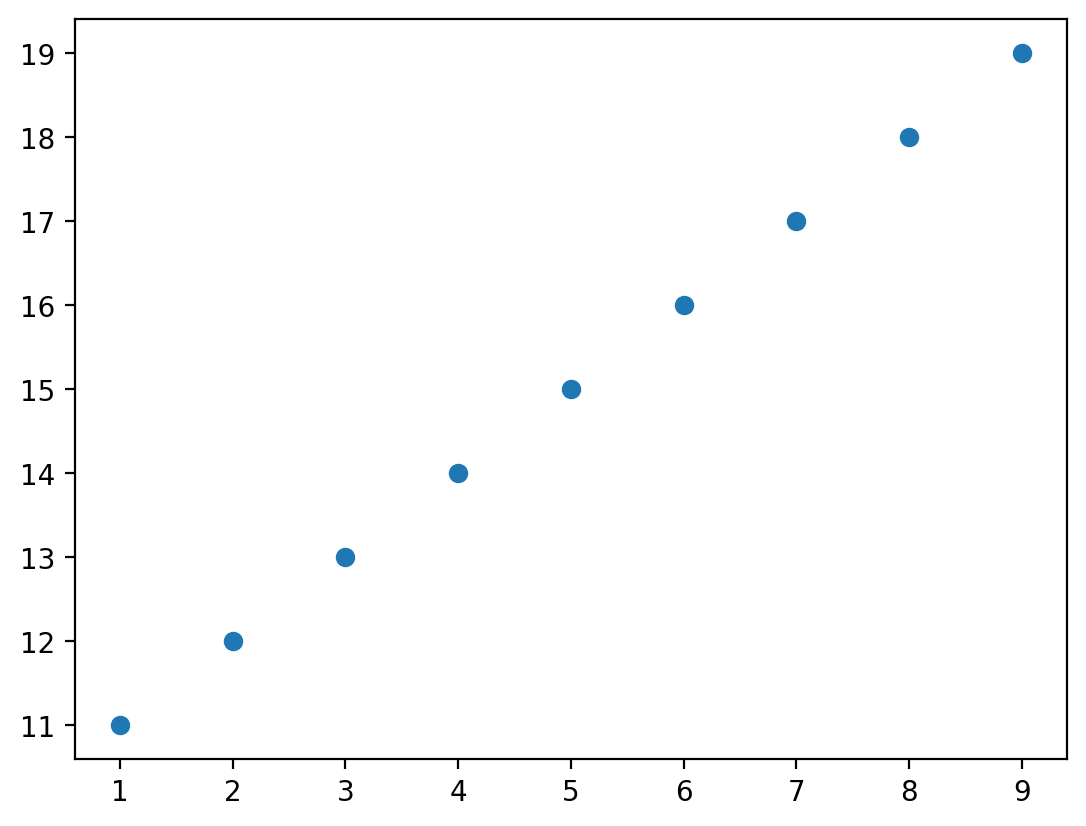

In [ ]:
x = np.arange(1, 10)
y = np.arange(11, 20)
p = plt.scatter(x, y)

#### Check-in

Are these variables related? If so, how?

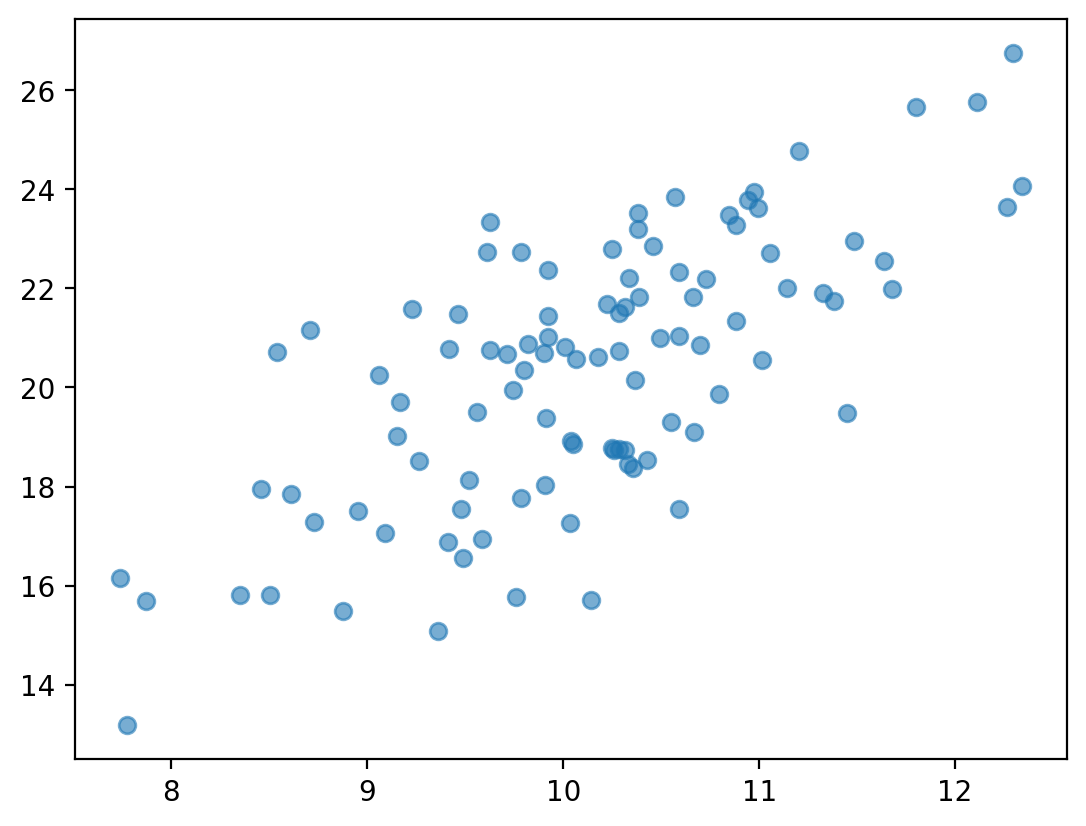

In [ ]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = x * 2 + np.random.normal(loc = 0, scale = 2, size = 100)
plt.scatter(x, y, alpha = .6);

#yes, I think they are related. we can obserwe that as x increases, y value increases also

#### Check-in

Are these variables related? If so, how?

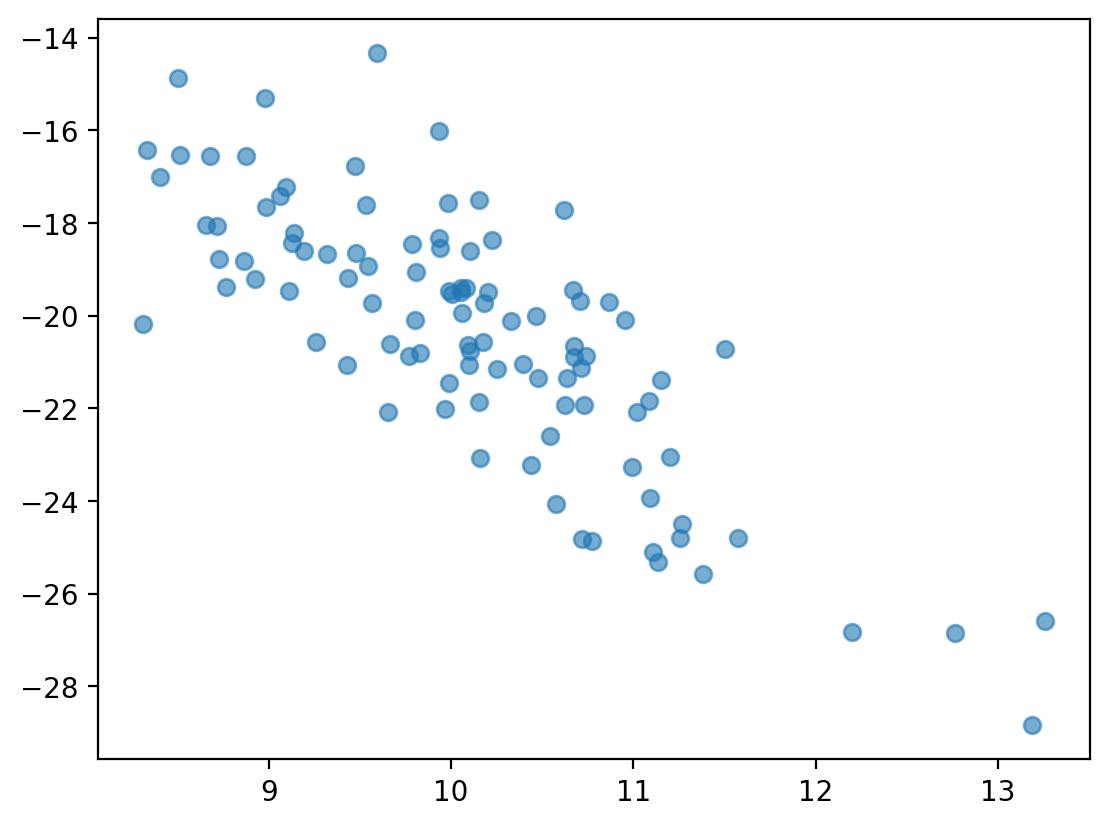

In [ ]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = -x * 2 + np.random.normal(loc = 0, scale = 2, size = 100)
plt.scatter(x, y, alpha = .6);

#yes It's simmilar case but this time they are decreasing

#### Scatterplots are useful for detecting non-linear relationships

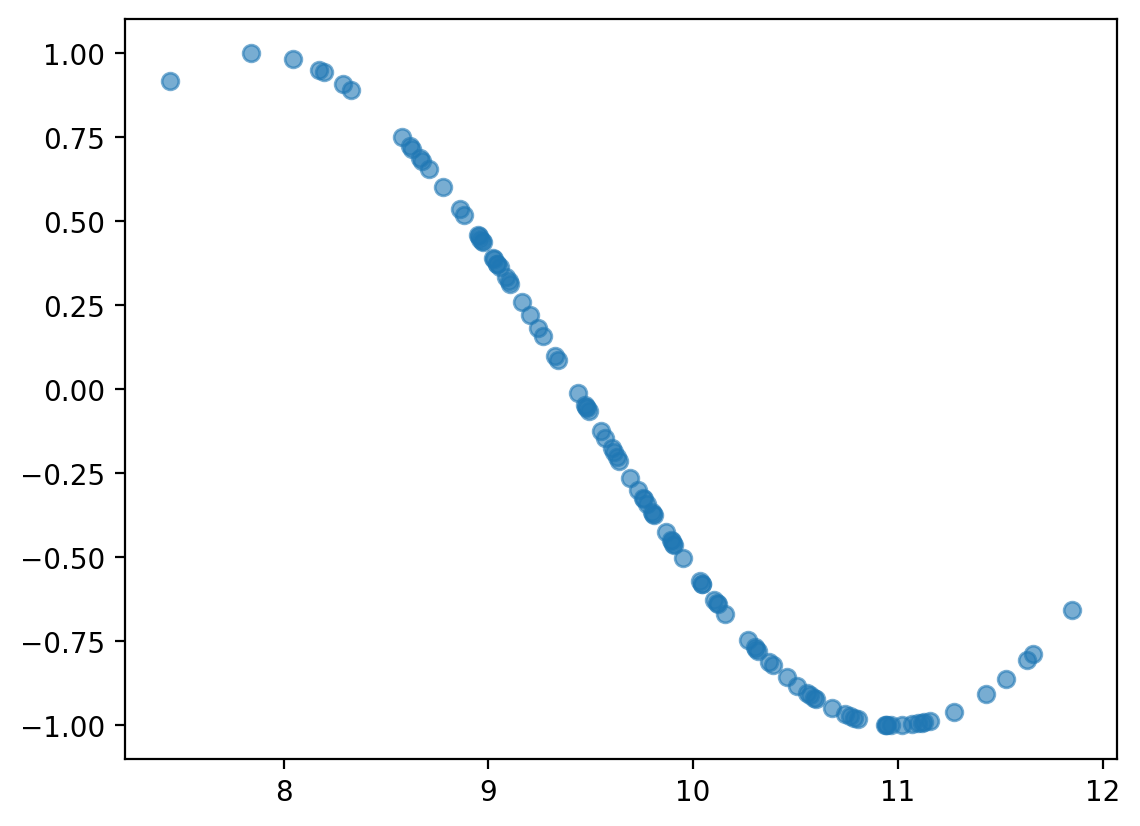

In [ ]:
x = np.random.normal(loc = 10, scale = 1, size = 100)
y = np.sin(x)
plt.scatter(x, y, alpha = .6);

#### Check-in

How would we visualize the relationship between `Attack` and `Speed` in our Pokemon dataset?

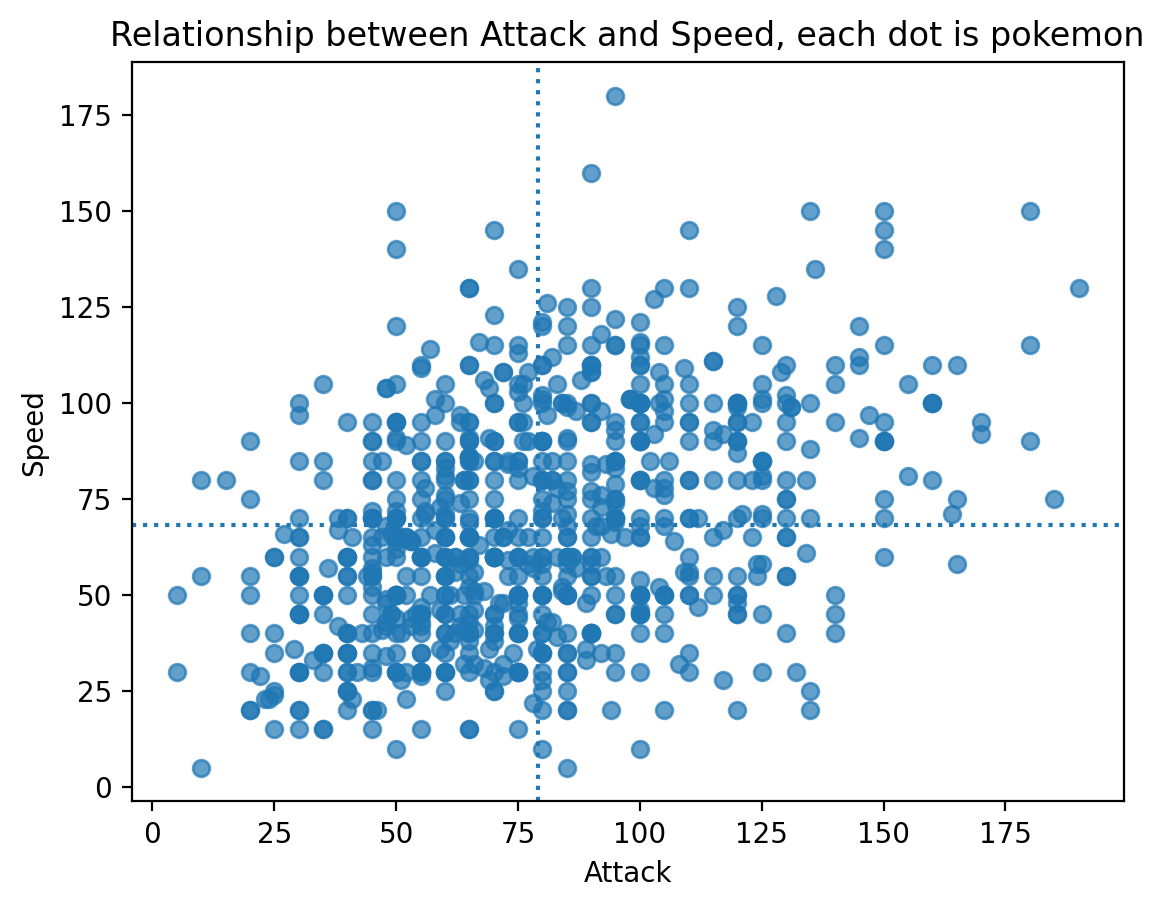

In [ ]:
x = df_pokemon["Attack"]
y = df_pokemon["Speed"]
plt.scatter(x, y,  alpha = .7);
plt.title('Relationship between Attack and Speed, each dot is pokemon')
plt.xlabel("Attack")
plt.ylabel("Speed")
plt.axvline(df_pokemon['Attack'].mean(), linestyle = "dotted");
plt.axhline(df_pokemon['Speed'].mean(), linestyle = "dotted");
plt.show()



## Scatterplots with `pyplot express`

With pyplot express we can play with scatterplots even further - we can create `bubble plots`!

In [ ]:
import plotly.express as px
bubble=px.scatter(df_pokemon, x='Attack', y='Speed', color='Generation', size='HP');
bubble.show()

## Barplots

### What is a barplot?

> A **barplot** visualizes the relationship between one *continuous* variable and a *categorical* variable.

- The *height* of each bar generally indicates the mean of the continuous variable.
- Each bar represents a different *level* of the categorical variable.

A barplot is a **bivariate** plot, i.e., it displays at least two variables.

### Barplots with `matplotlib`

`plt.bar` can be used to create a **barplot** of our data.

- E.g., average `Attack` by `Legendary` status.
- However, we first need to use `groupby` to calculate the mean `Attack` per level.

#### Step 1: Using `groupby`

In [ ]:
summary = df_pokemon[['Legendary', 'Attack']].groupby("Legendary").mean().reset_index()
summary

,Legendary,Attack
0,False,75.669388
1,True,116.676923


In [ ]:
### Turn Legendary into a str
summary['Legendary'] = summary['Legendary'].apply(lambda x: str(x))
summary

,Legendary,Attack
0,False,75.669388
1,True,116.676923


#### Step 2: Pass values into `plt.bar`

**Check-in**:

- What do we learn from this plot?  
- What is this plot missing?

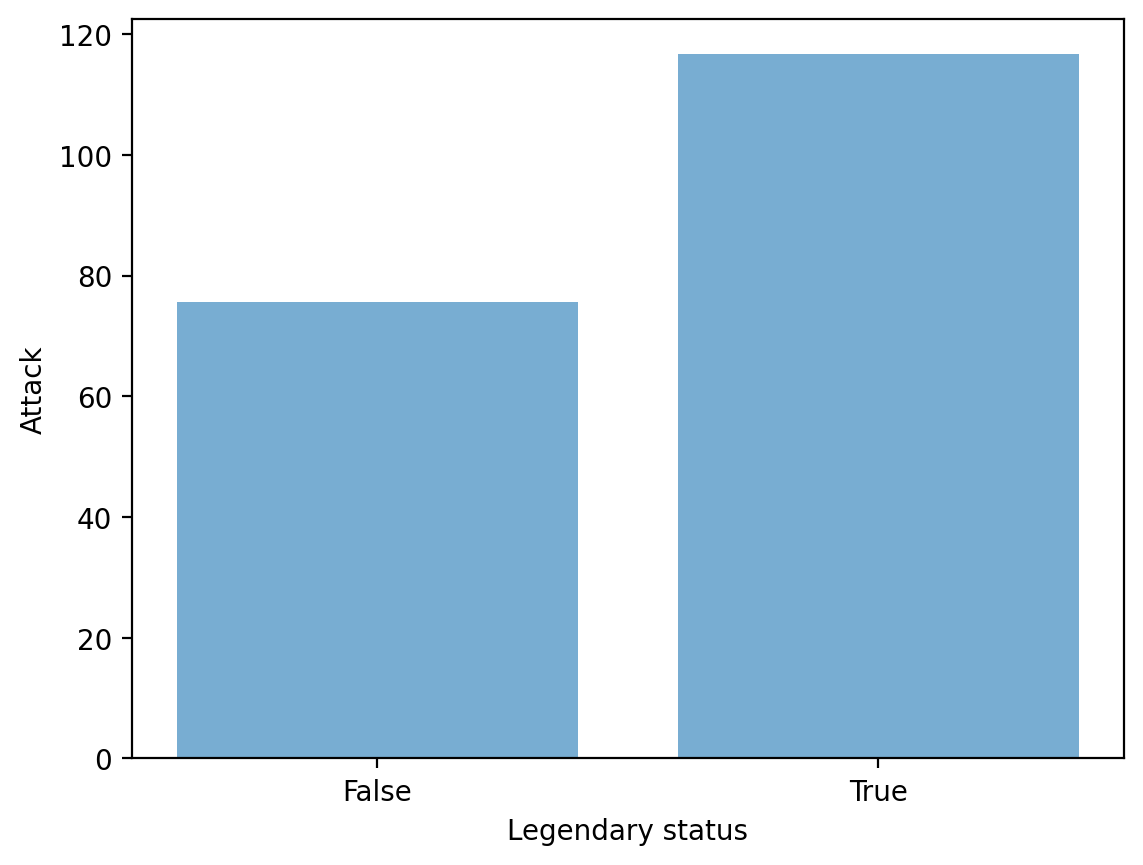

In [ ]:
plt.bar(x = summary['Legendary'],height = summary['Attack'],alpha = .6);
plt.xlabel("Legendary status");
plt.ylabel("Attack");

## Barplots in `plotly.express`


In [ ]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [ ]:
data_canada.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.75,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.96,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.30,18985849,13462.48555,CAN,124


In [ ]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long format of data")
fig.show()

long_df.head(3)

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9


In [ ]:
wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide format of data")
fig.show()

wide_df.head(3)

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


## Faceting barplots

Please use faceting for the Pokemon data with barplots:

In [ ]:
fig = px.bar(df_pokemon, x='Type 1', facet_row='Legendary')
fig.show()
 

For more information please go to the tutorial [Plotly Express Wide-Form Support in Python](https://plotly.com/python/wide-form/).

## Conclusion

This concludes our first introduction to **data visualization**:

- Working with `matplotlib.pyplot`.  
- Working with more convenient version of `pyplot.express`.
- Creating basic plots: histograms, scatterplots, and barplots.

Next time, we'll move onto discussing `seaborn`, another very useful package for data visualization.

# Data visualization, pt. 2 (`seaborn`)

## Goals of this exercise

- Introducting `seaborn`. 
- Putting `seaborn` into practice:
  - **Univariate** plots (histograms).  
  - **Bivariate** continuous plots (scatterplots and line plots).
  - **Bivariate** categorical plots (bar plots, box plots, and strip plots).

## Introducing `seaborn`

### What is `seaborn`?

> [`seaborn`](https://seaborn.pydata.org/) is a data visualization library based on `matplotlib`.

- In general, it's easier to make nice-looking graphs with `seaborn`.
- The trade-off is that `matplotlib` offers more flexibility.

In [ ]:
import seaborn as sns ### importing seaborn
import pandas as pd
import matplotlib.pyplot as plt ## just in case we need it
import numpy as np

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### The `seaborn` hierarchy of plot types

We'll learn more about exactly what this hierarchy means today (and in next lecture).

![title](img/seaborn_library.png)

### Example dataset

Today we'll work with a new dataset, from [Gapminder](https://www.gapminder.org/data/documentation/). 

- **Gapminder** is an independent Swedish foundation dedicated to publishing and analyzing data to correct misconceptions about the world.
- Between 1952-2007, has data about `life_exp`, `gdp_cap`, and `population`.

In [ ]:
df_gapminder = pd.read_csv("data/gapminder_full.csv")

In [ ]:
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [ ]:
df_gapminder.shape

(1704, 6)

## Univariate plots

> A **univariate plot** is a visualization of only a *single* variable, i.e., a **distribution**.

![title](img/displot.png)

### Histograms with `sns.histplot`

- We've produced histograms with `plt.hist`.  
- With `seaborn`, we can use `sns.histplot(...)`.

Rather than use `df['col_name']`, we can use the syntax:

```python
sns.histplot(data = df, x = col_name)
```

This will become even more useful when we start making **bivariate plots**.

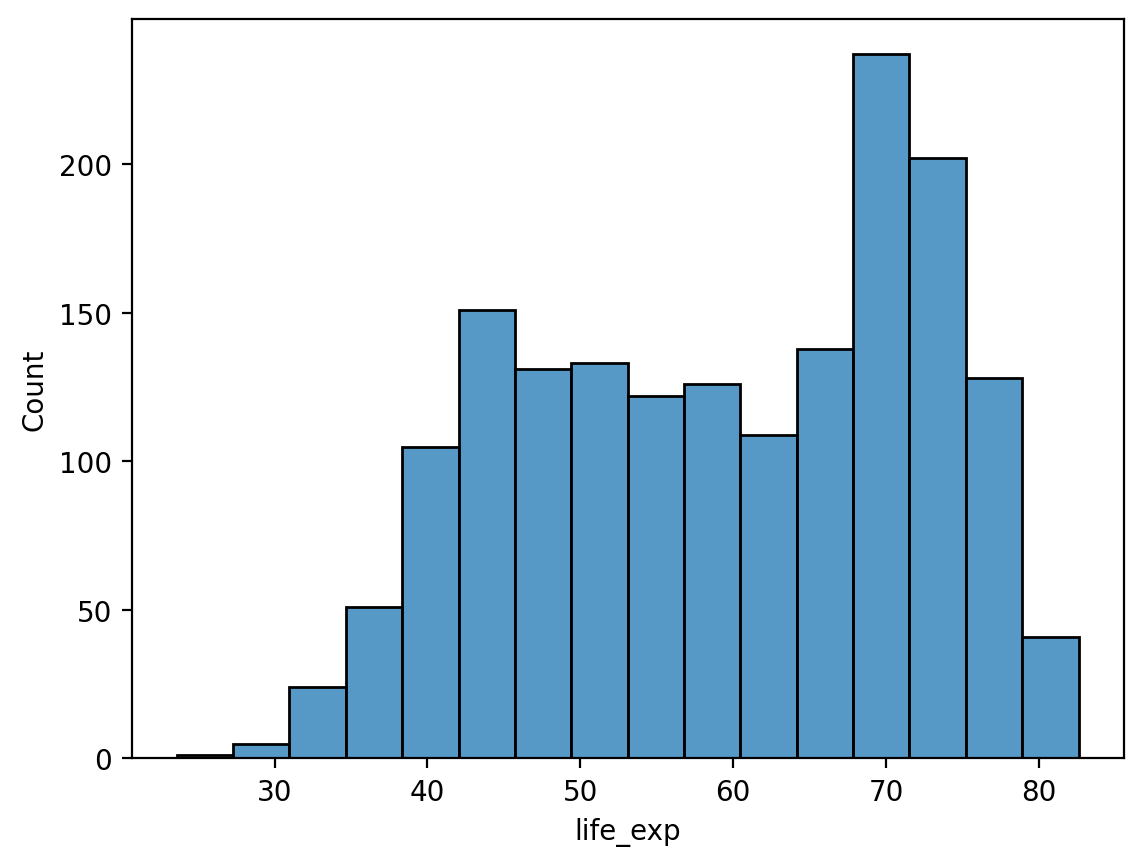

In [ ]:
# Histogram of life expectancy
sns.histplot(data = df_gapminder, x = "life_exp");

#### Modifying the number of bins

As with `plt.hist`, we can modify the number of *bins*.

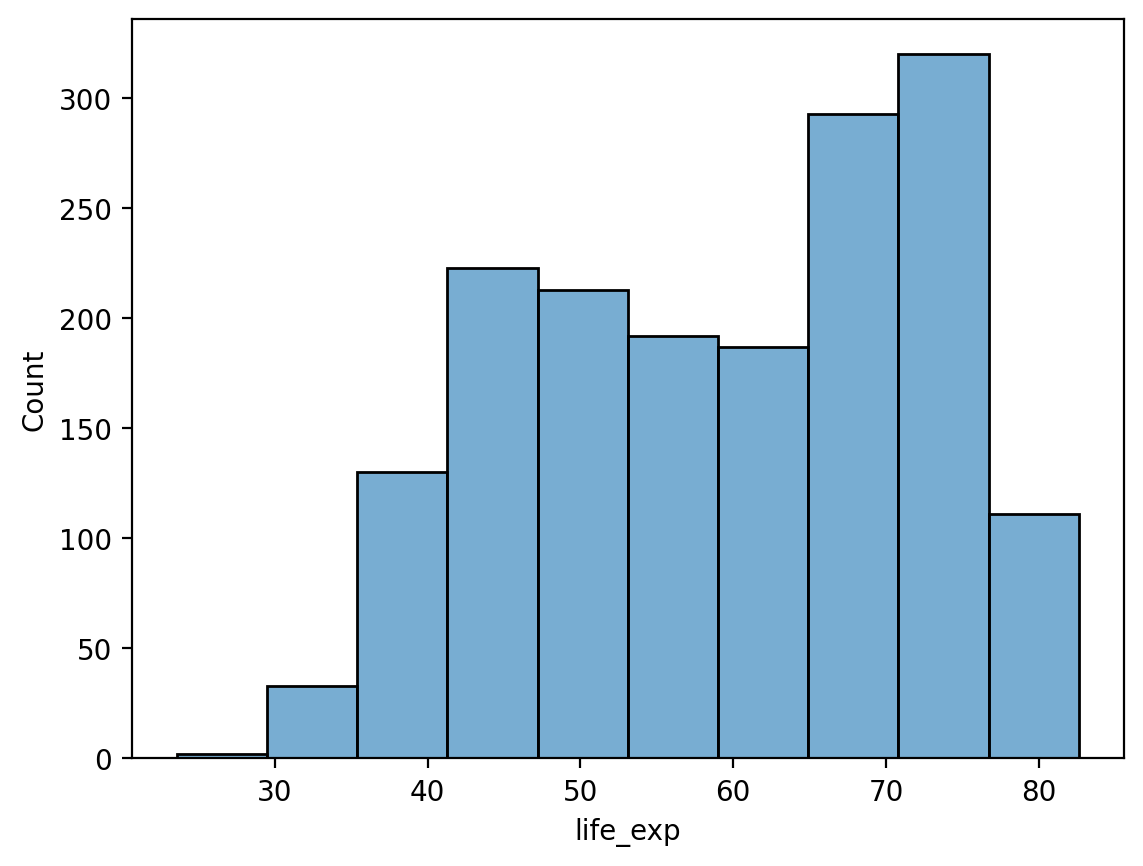

In [ ]:
# Fewer bins
sns.histplot(data = df_gapminder, x = 'life_exp', bins = 10, alpha = .6);

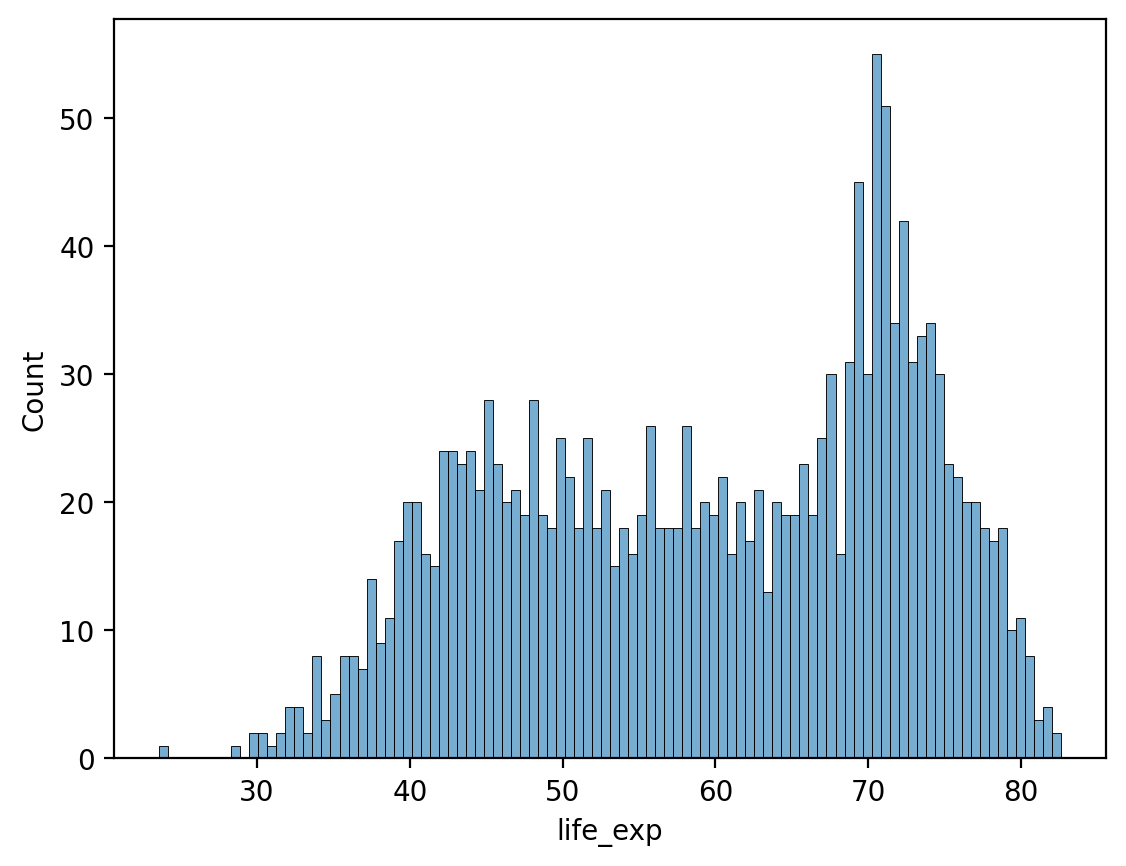

In [ ]:
# Many more bins!
sns.histplot(data = df_gapminder, x = 'life_exp', bins = 100, alpha = .6);

#### Modifying the y-axis with `stat`

By default, `sns.histplot` will plot the **count** in each bin. However, we can change this using the `stat` parameter:

- `probability`: normalize such that bar heights sum to `1`.
- `percent`: normalize such that bar heights sum to `100`.
- `density`: normalize such that total *area* sums to `1`.


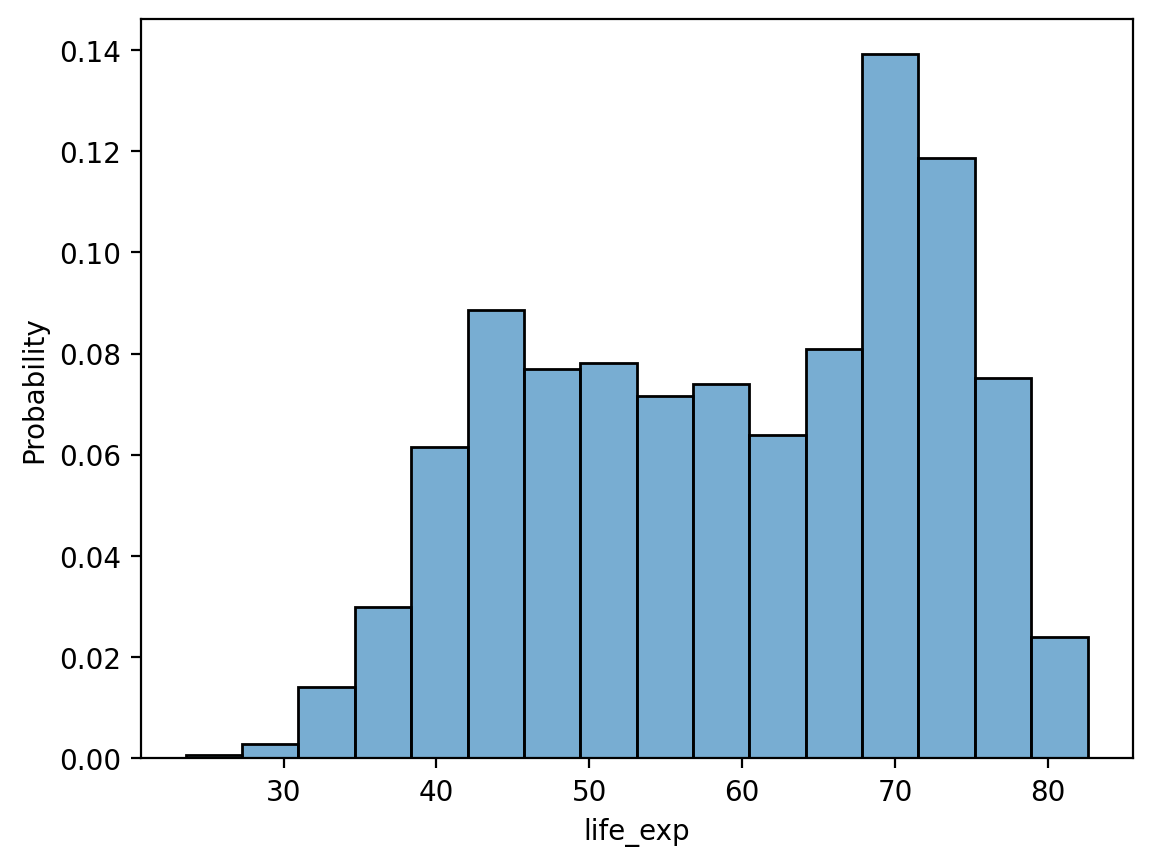

In [ ]:
# Note the modified y-axis!
sns.histplot(data = df_gapminder, x = 'life_exp', stat = "probability", alpha = .6);

### Check-in

How would you make a histogram showing the distribution of `population` values in `2007` alone? 

- Bonus 1: Modify this graph to show `probability`, not `count`.
- Bonus 2: What do you notice about this graph, and how might you change it?

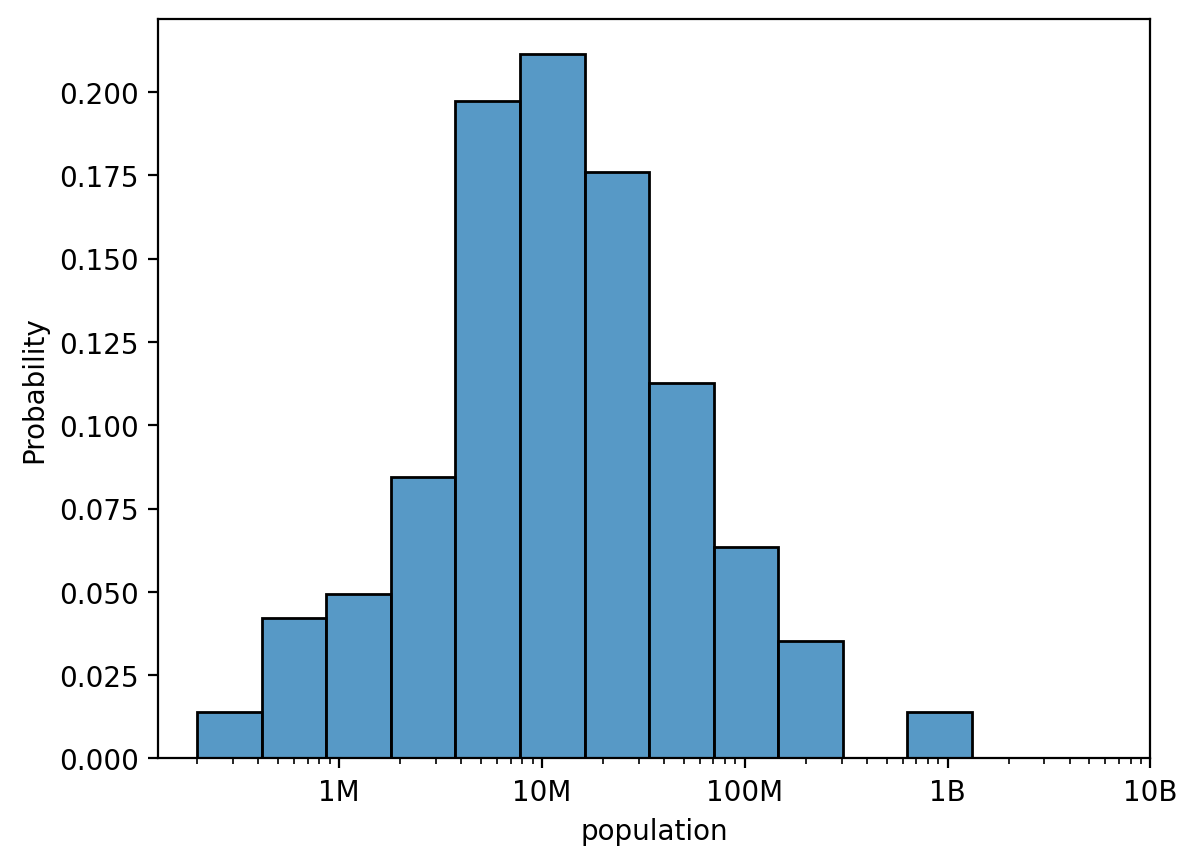

In [ ]:
### Your code here
year = 2007
sns.histplot(data = df_gapminder[df_gapminder['year'] == year], x = "population", stat = "probability", log_scale=(True, False))

# for bonus 2; without log_scale the very tall pillar at 0 sticks out and looks bad, hence log_scale
# but log_scale disappears the population numbers, so plt.xticks() is needed
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10], ["1M", "10M", "100M", "1B", "10B"])  #M and B are more legible than exponents, in my opinion
plt.show()

## Bivariate continuous plots

> A **bivariate continuous plot** visualizes the relationship between *two continuous variables*.

![title](img/seaborn_relplot.png)

### Scatterplots with `sns.scatterplot`

> A **scatterplot** visualizes the relationship between two continuous variables.

- Each observation is plotted as a single dot/mark. 
- The position on the `(x, y)` axes reflects the value of those variables.

One way to make a scatterplot in `seaborn` is using `sns.scatterplot`.

#### Showing `gdp_cap` by `life_exp`

What do we notice about `gdp_cap`?

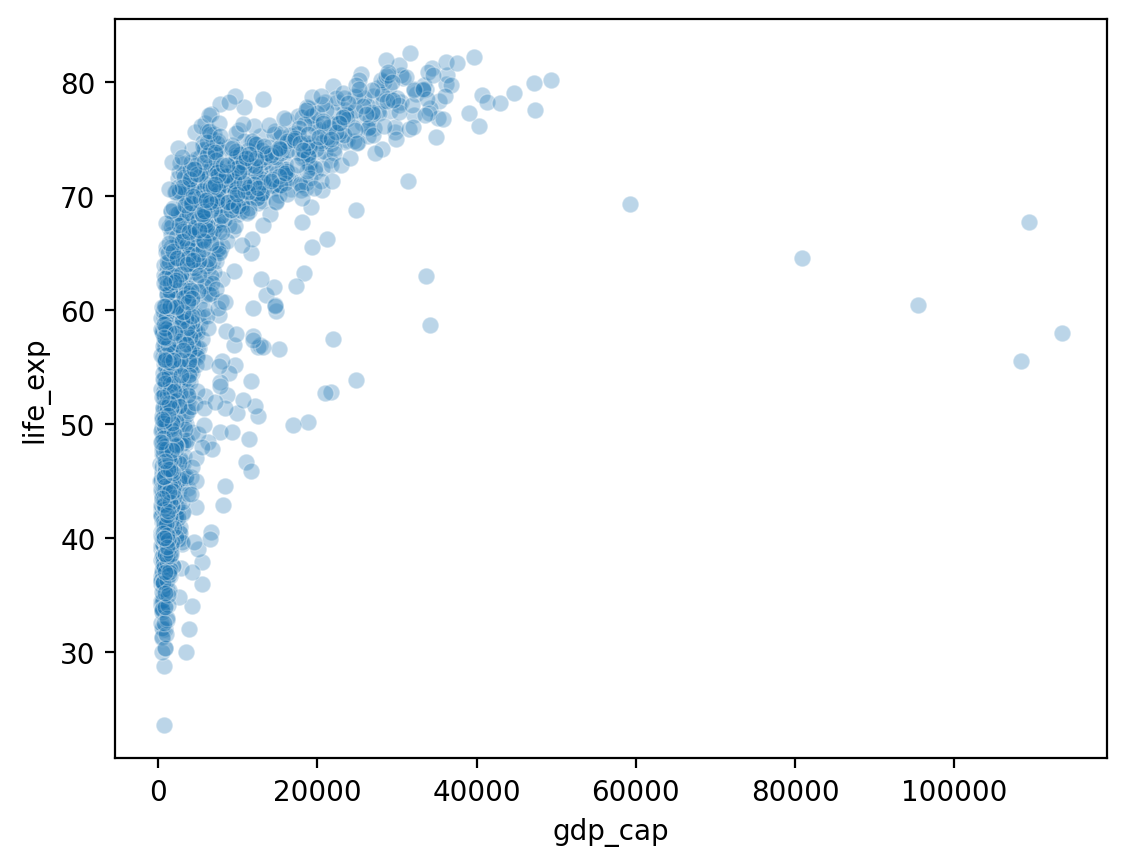

In [ ]:
sns.scatterplot(data = df_gapminder, x = 'gdp_cap',
               y = 'life_exp', alpha = .3);

# we can observe a good share of gdp_cap is comparably low regardless of life_exp,
# but has a tendency to rise with life_exp, save few outliers

#### Showing `gdp_cap_log` by `life_exp`

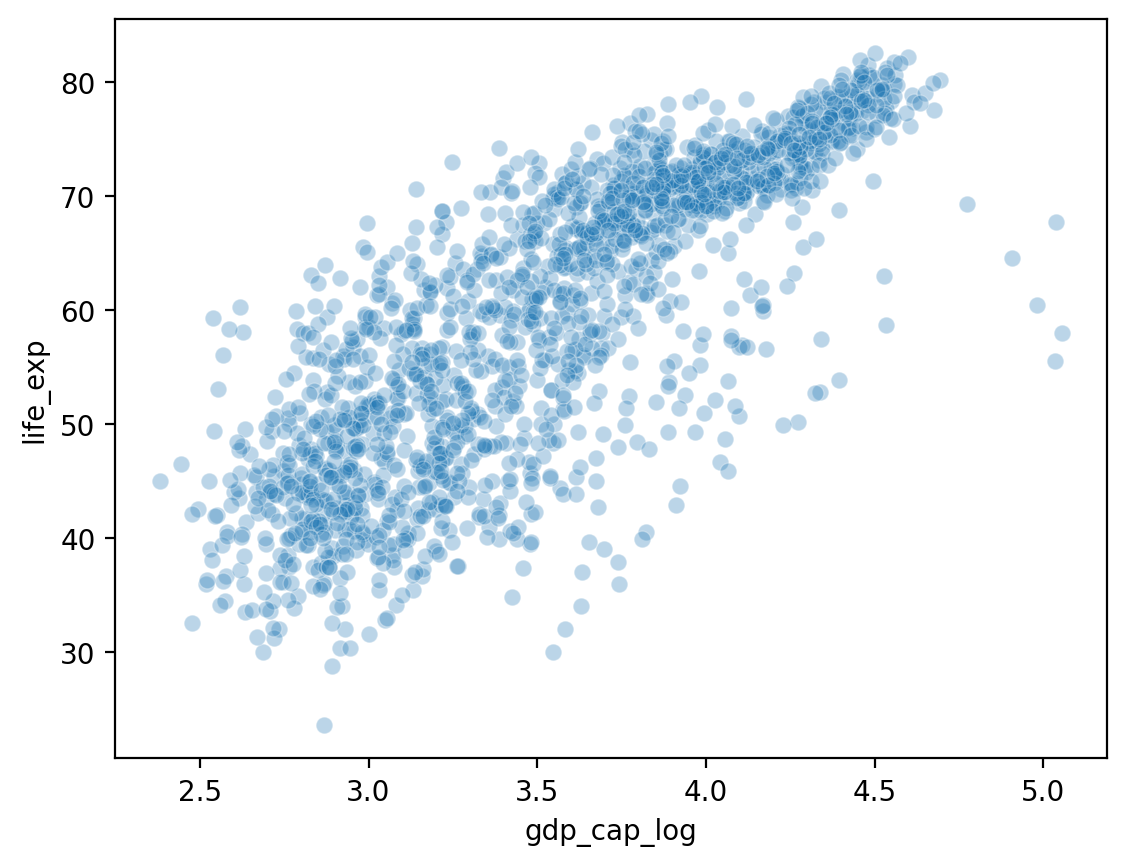

In [ ]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder, x = 'gdp_cap_log', y = 'life_exp', alpha = .3);

#### Adding a `hue`

- What if we want to add a *third* component that's categorical, like `continent`?
- `seaborn` allows us to do this with `hue`.

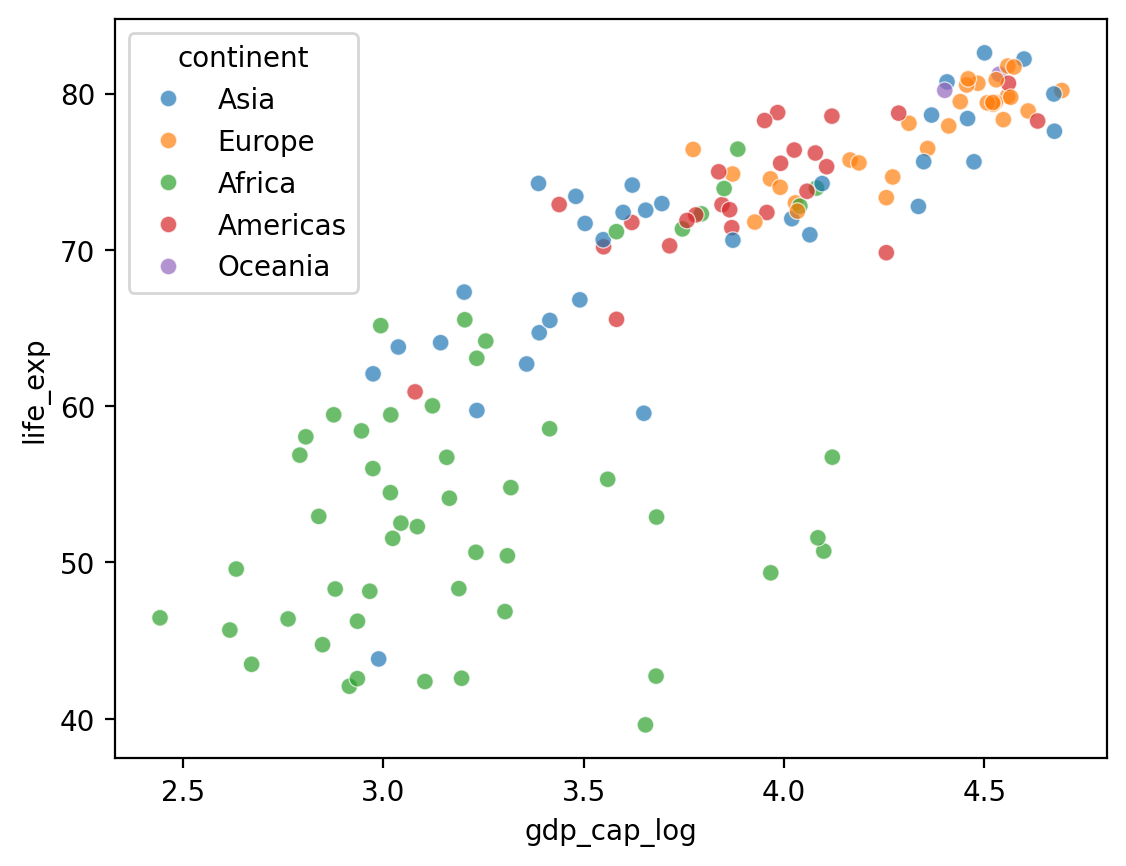

In [ ]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp', hue = "continent", alpha = .7);

#### Adding a `size`

- What if we want to add a *fourth* component that's continuous, like `population`?
- `seaborn` allows us to do this with `size`.

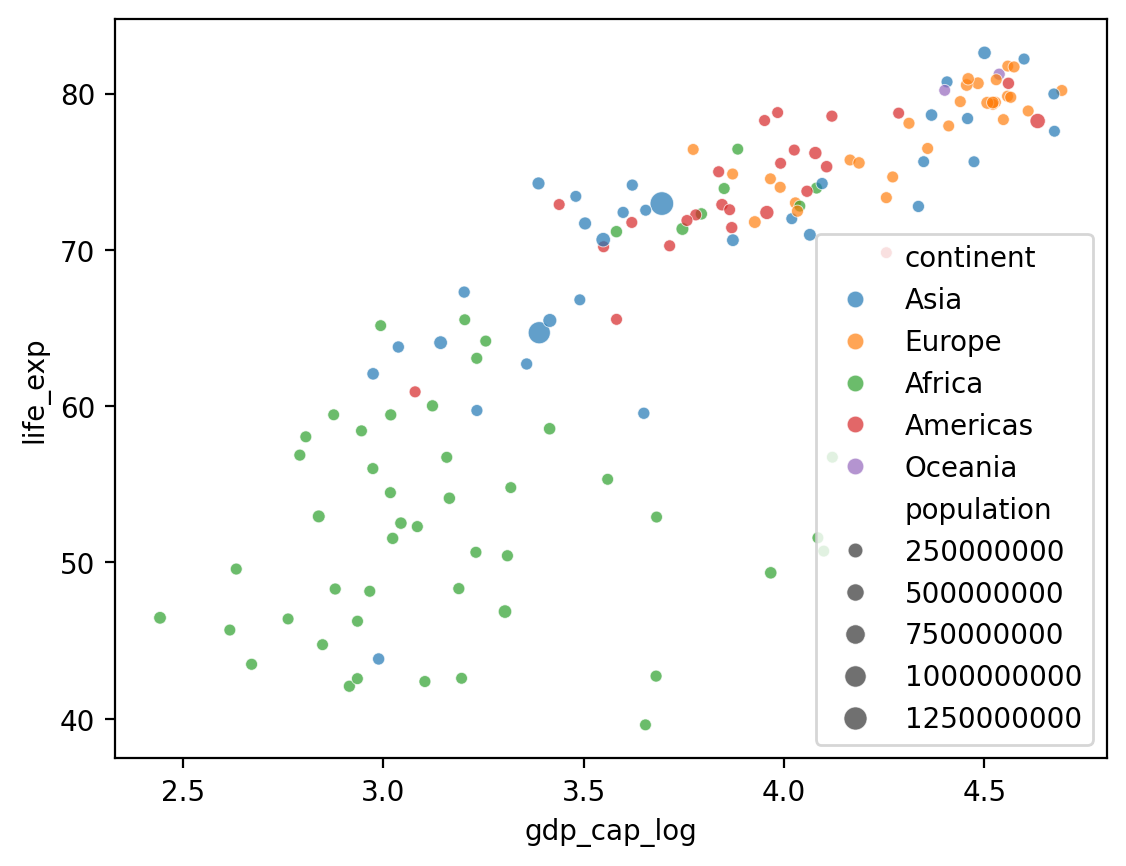

In [ ]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp',
                hue = "continent", size = 'population', alpha = .7);

#### Changing the position of the legend

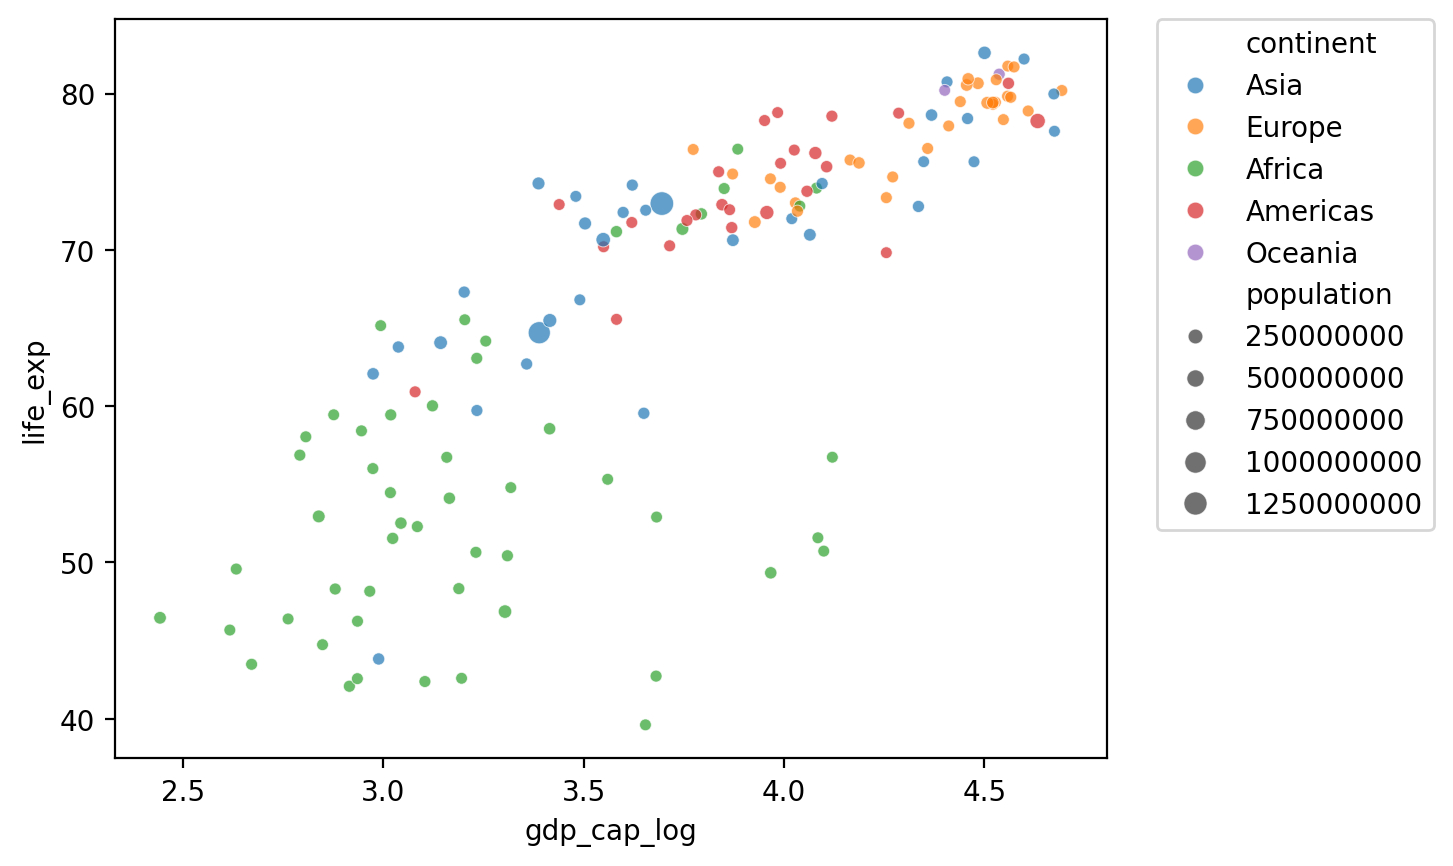

In [ ]:
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp',
                hue = "continent", size = 'population', alpha = .7);

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

### Lineplots with `sns.lineplot`

> A **lineplot** also visualizes the relationship between two continuous variables.

- Typically, the position of the line on the `y` axis reflects the *mean* of the `y`-axis variable for that value of `x`.
- Often used for plotting **change over time**.

One way to make a lineplot in `seaborn` is using [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

#### Showing `life_exp` by `year`

What general trend do we notice?

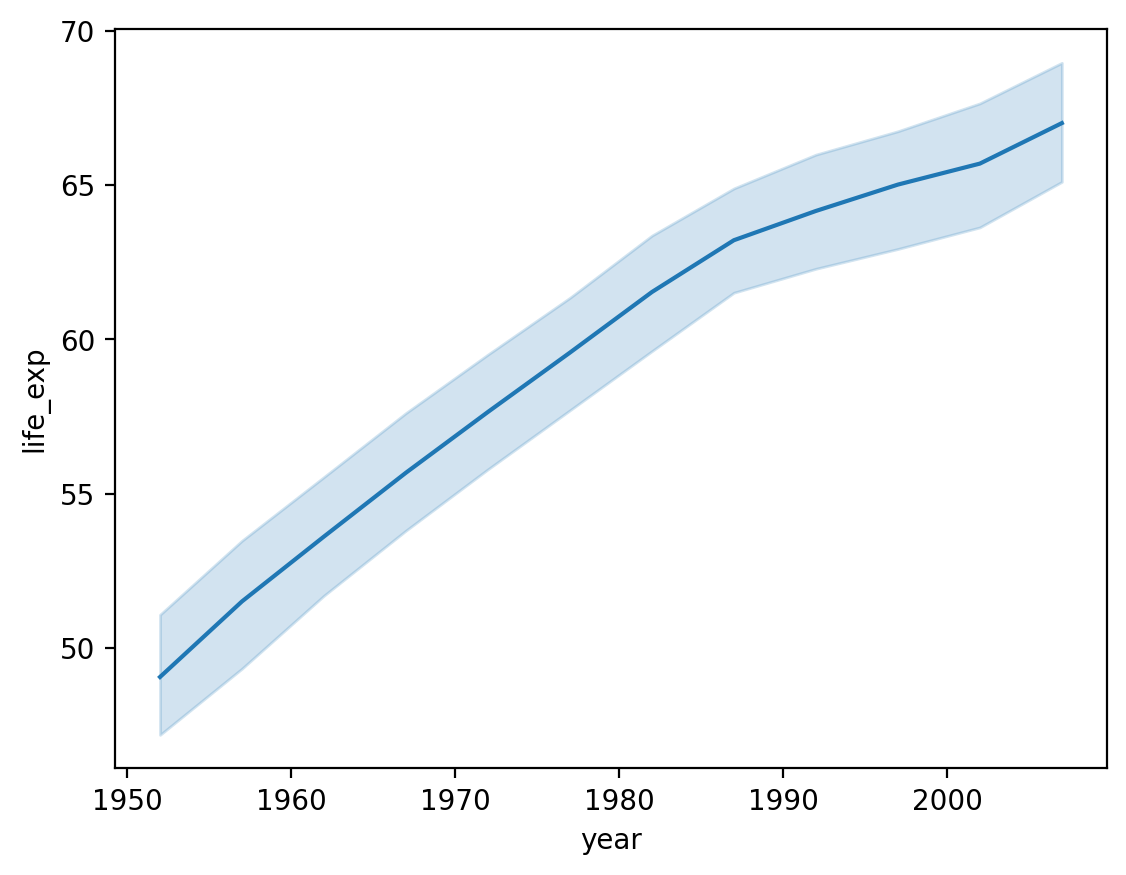

In [ ]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp');

# we can see life expectancy has been growing every year

#### Modifying how error/uncertainty is displayed

- By default, `seaborn.lineplot` will draw **shading** around the line representing a confidence interval.
- We can change this with `errstyle`.

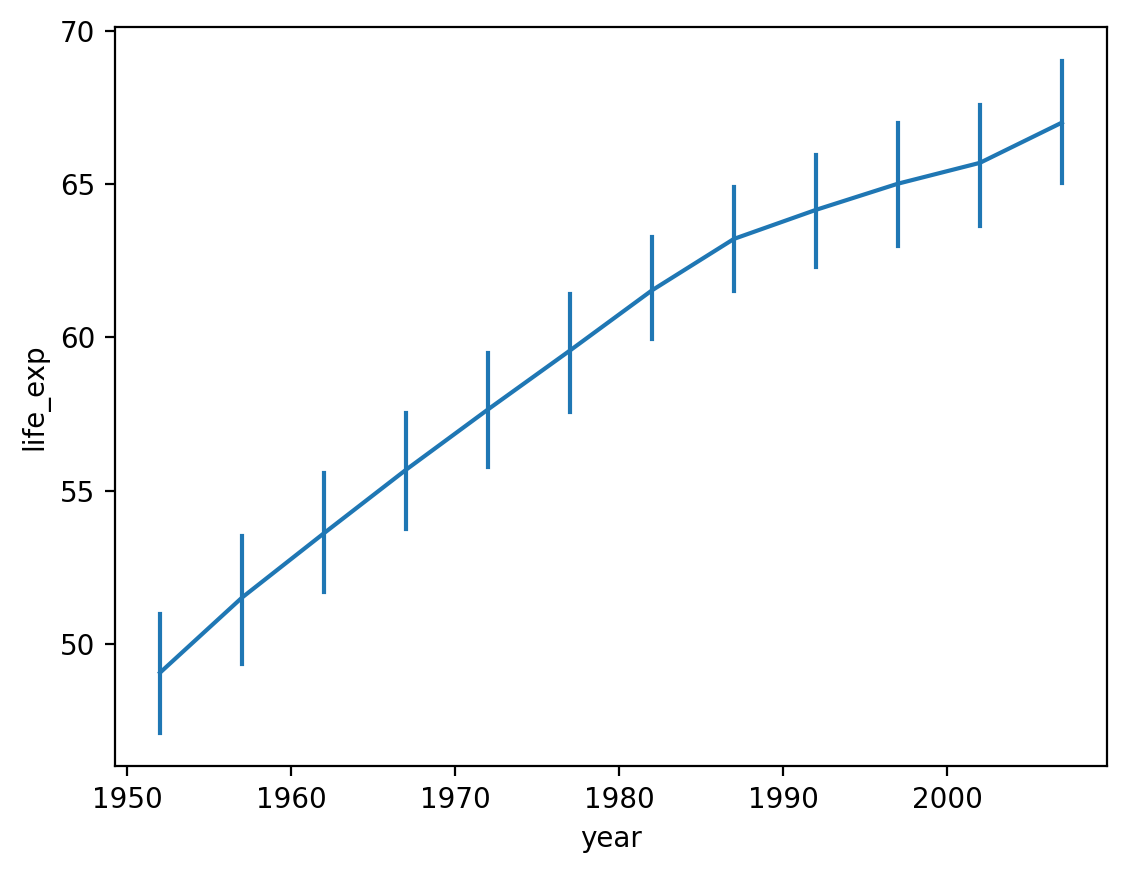

In [ ]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp',
            err_style = "bars");

#### Adding a `hue`

- We could also show this by `continent`.  
- There's (fortunately) a positive trend line for each `continent`.

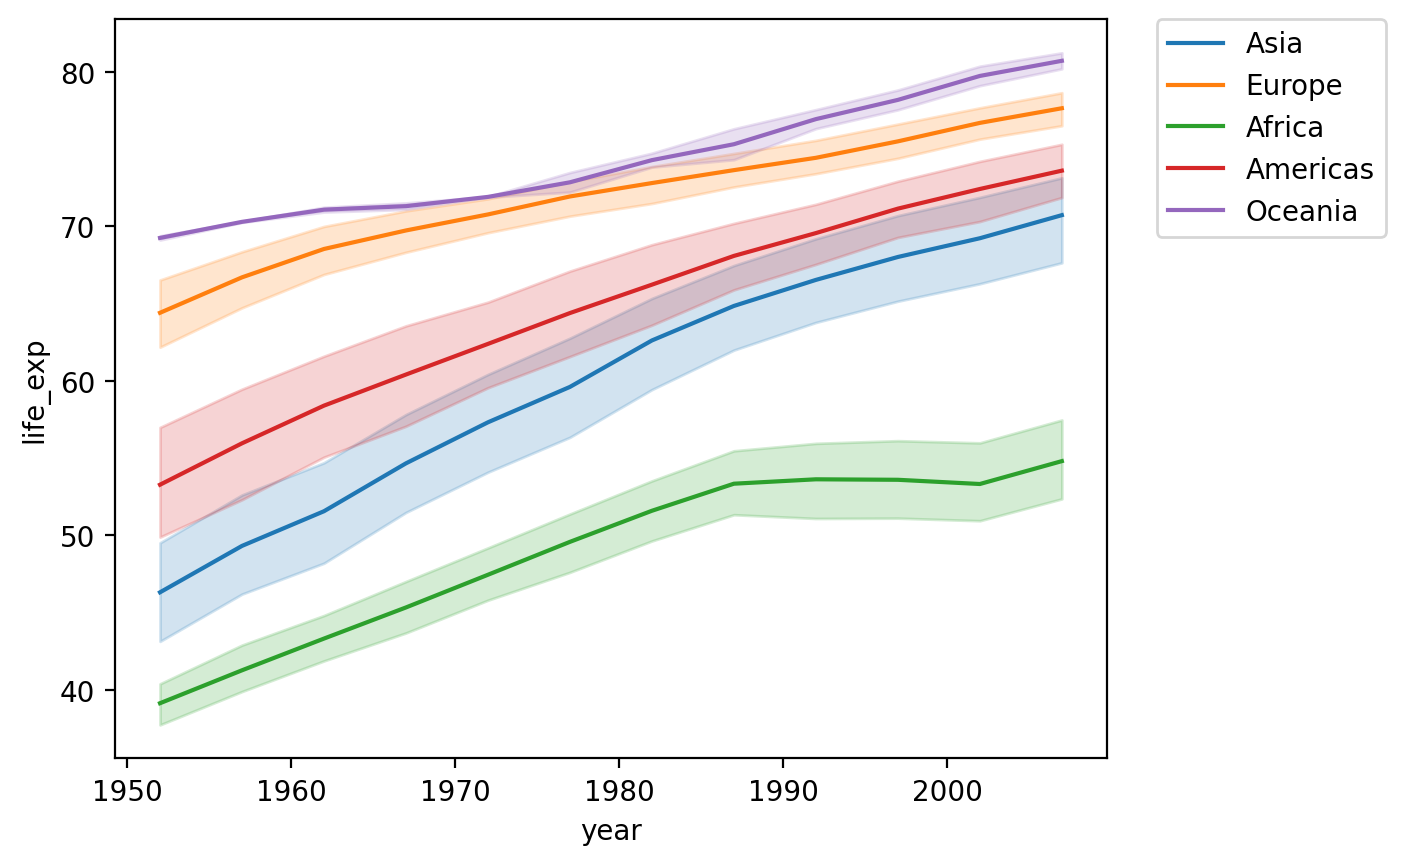

In [ ]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp',
            hue = "continent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#### Check-in

How would you plot the relationship between `year` and `gdp_cap` for countries in the `Americas` only?

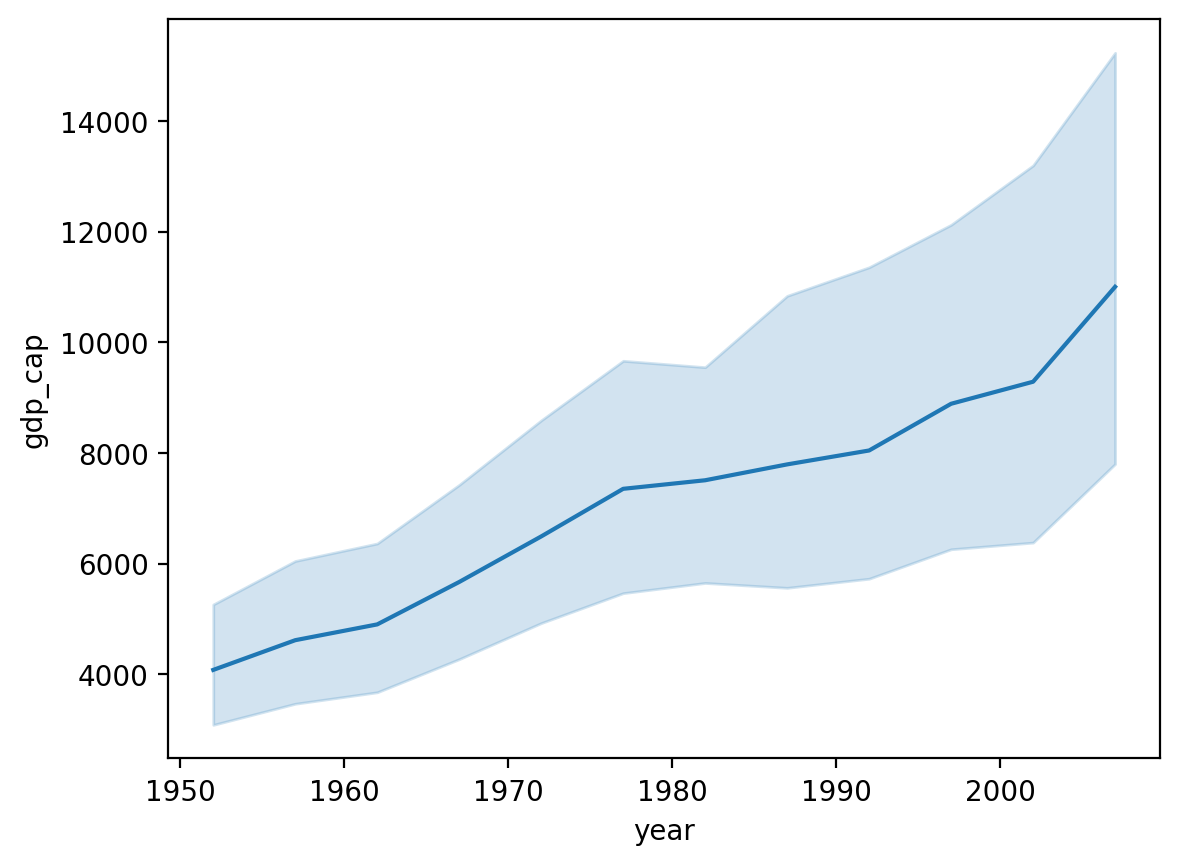

In [ ]:
### Your code here
sns.lineplot(data = df_gapminder[df_gapminder['continent'] == 'Americas'],
             x = 'year',
             y = 'gdp_cap');

#### Heteroskedasticity in `gdp_cap` by `year`

- [**Heteroskedasticity**](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) is when the *variance* in one variable (e.g., `gdp_cap`) changes as a function of another variable (e.g., `year`).
- In this case, why do you think that is?
- Likely because, over time, richer and more peaceful countries (i.e. USA) prospered and grew much faster than poorer regions, often dealing with unrest and civil wars

#### Plotting by country

- There are too many countries to clearly display in the `legend`. 
- But the top two lines are the `United States` and `Canada`.
   - I.e., two countries have gotten much wealthier per capita, while the others have not seen the same economic growth.

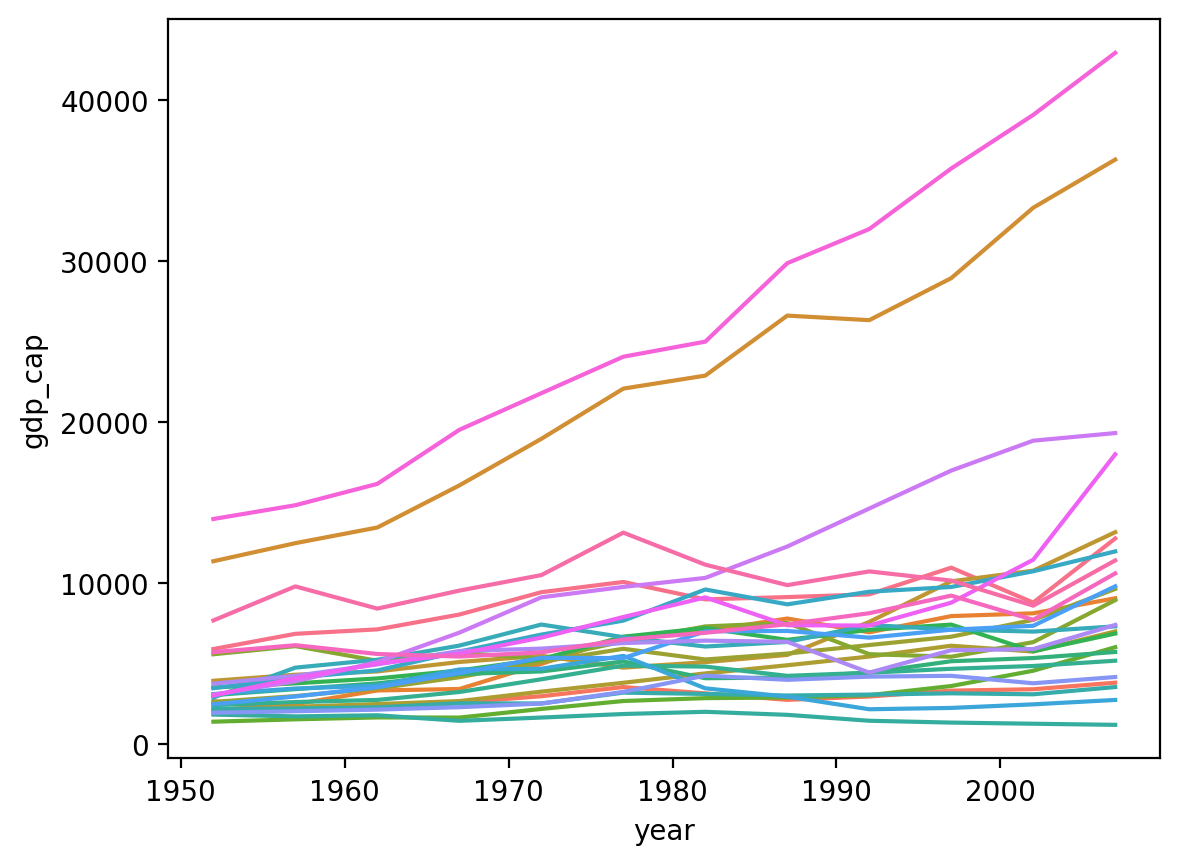

In [ ]:
sns.lineplot(data = df_gapminder[df_gapminder['continent']=="Americas"],
             x = 'year', y = 'gdp_cap', hue = "country", legend = None);

### Using `replot`

- `relplot` allows you to plot either line plots or scatter plots using `kind`.
- `relplot` also makes it easier to `facet` (which we'll discuss momentarily).

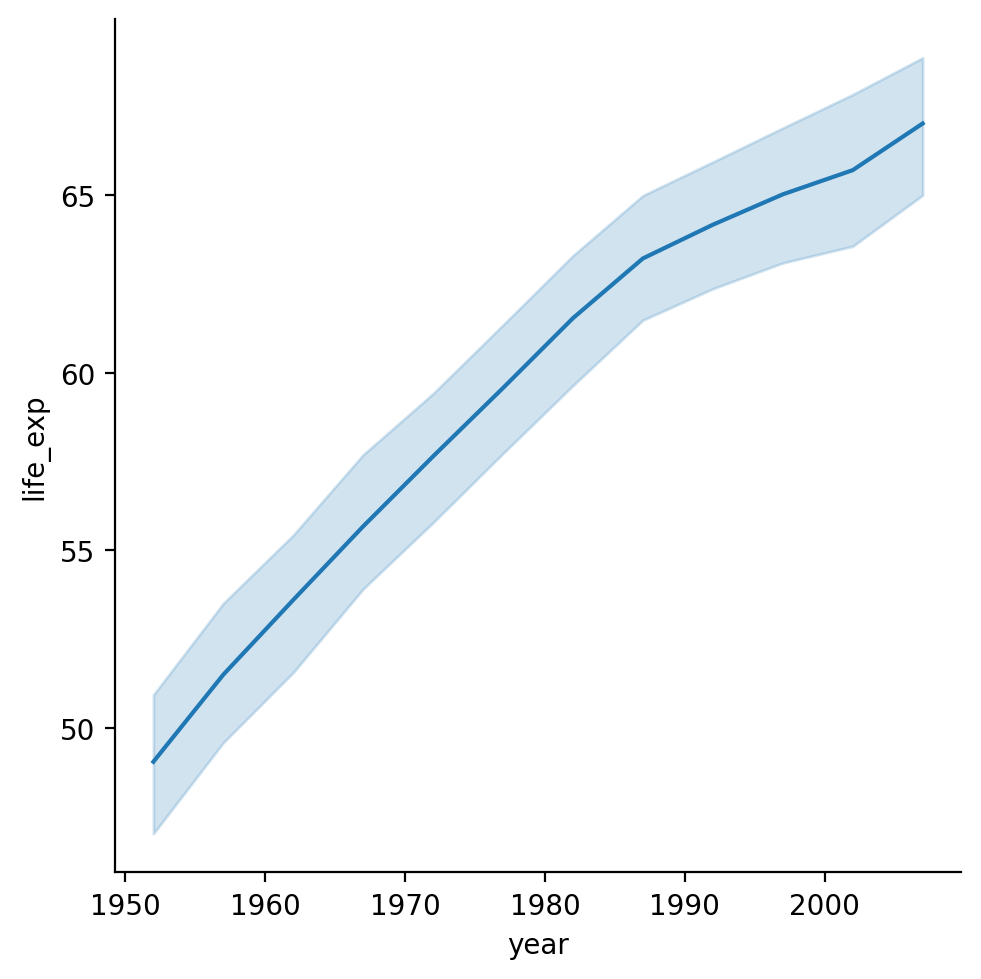

In [ ]:
sns.relplot(data = df_gapminder, x = "year", y = "life_exp", kind = "line");

#### Faceting into `rows` and `cols`

We can also plot the same relationship across multiple "windows" or **facets** by adding a `rows`/`cols` parameter.

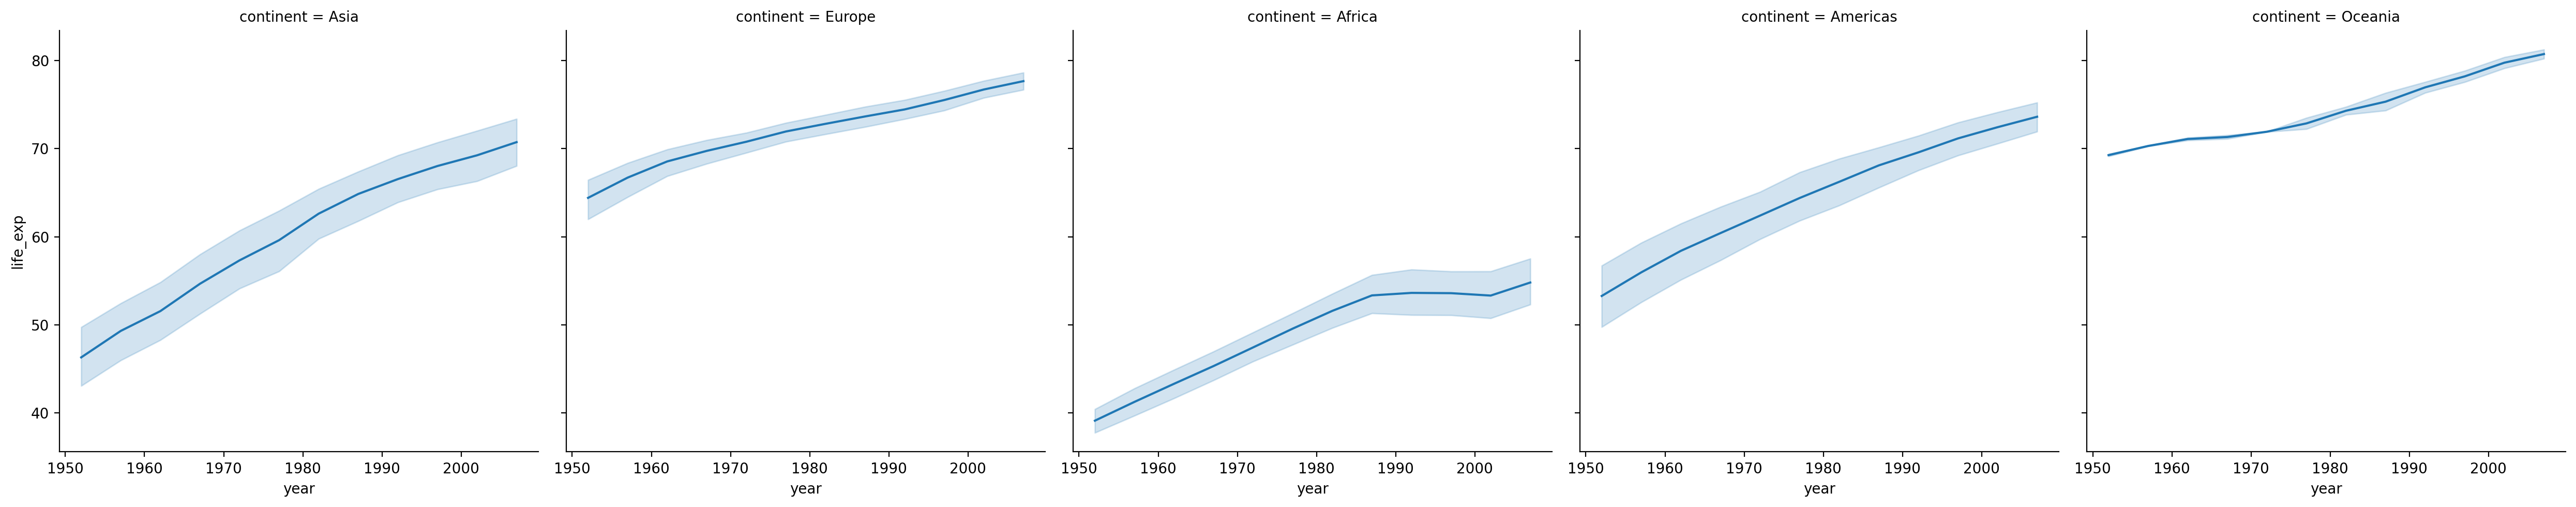

In [ ]:
sns.relplot(data = df_gapminder, x = "year", y = "life_exp", kind = "line", col = "continent");

## Bivariate categorical plots

> A **bivariate categorical plot** visualizes the relationship between one categorical variable and one continuous variable.

![title](img/seaborn_catplot.png)

### Example dataset

Here, we'll return to our Pokemon dataset, which has more examples of categorical variables.

In [ ]:
df_pokemon = pd.read_csv("data/pokemon.csv")

### Barplots with `sns.barplot`

> A **barplot** visualizes the relationship between one *continuous* variable and a *categorical* variable.

- The *height* of each bar generally indicates the mean of the continuous variable.
- Each bar represents a different *level* of the categorical variable.

With `seaborn`, we can use the function `sns.barplot`.

#### Average `Attack` by `Legendary` status

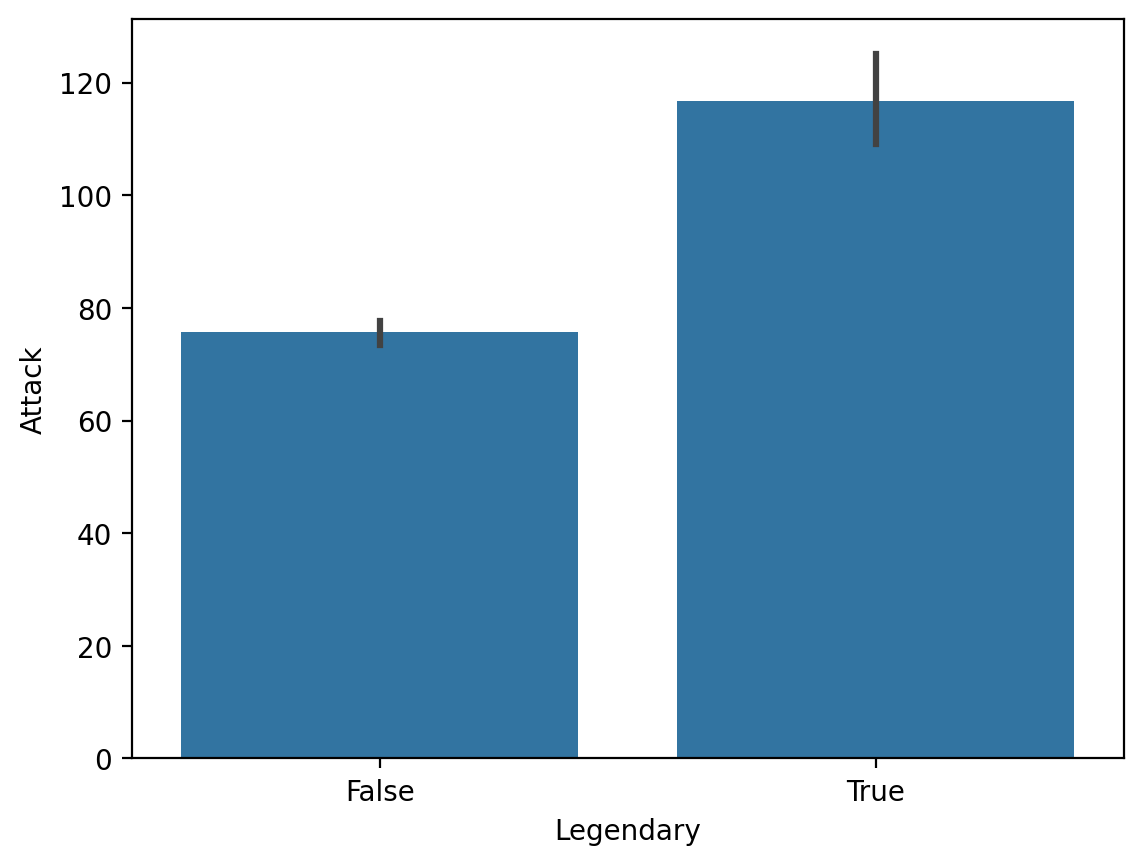

In [ ]:
sns.barplot(data = df_pokemon,
           x = "Legendary", y = "Attack");

#### Average `Attack` by `Type 1`

Here, notice that I make the figure *bigger*, to make sure the labels all fit.

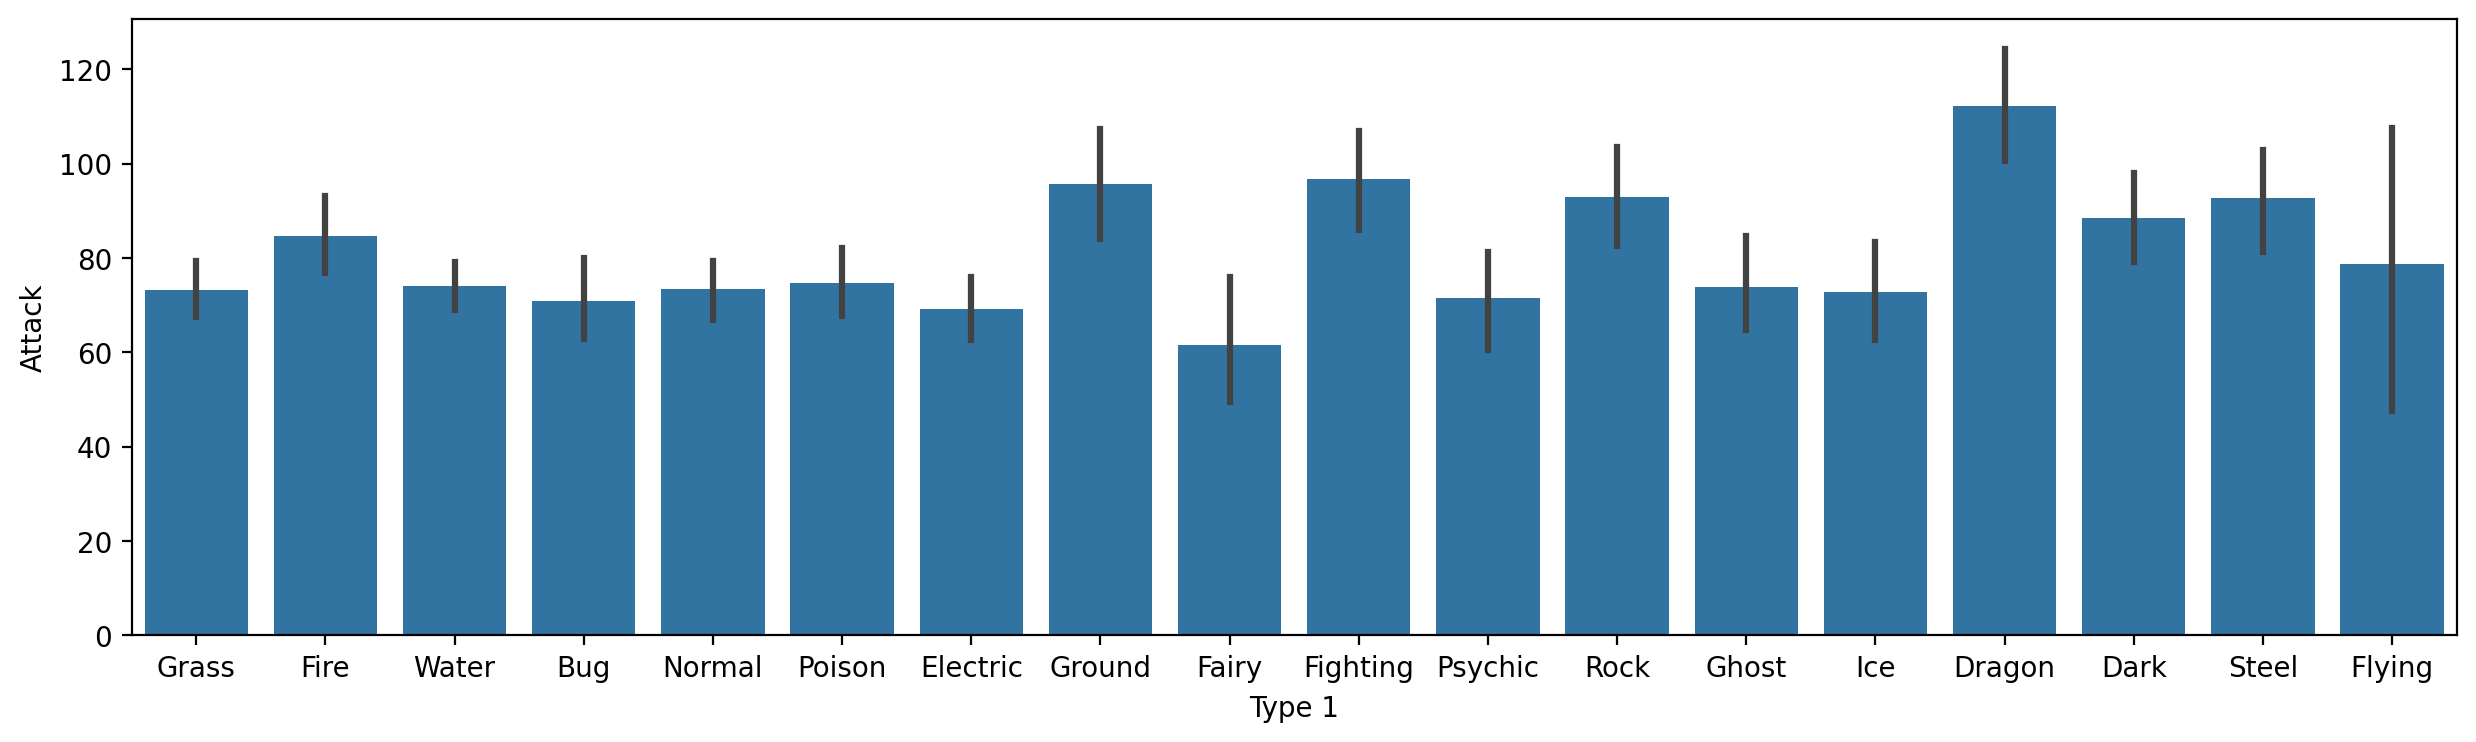

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "Attack");

#### Check-in

How would you plot `HP` by `Type 1`?

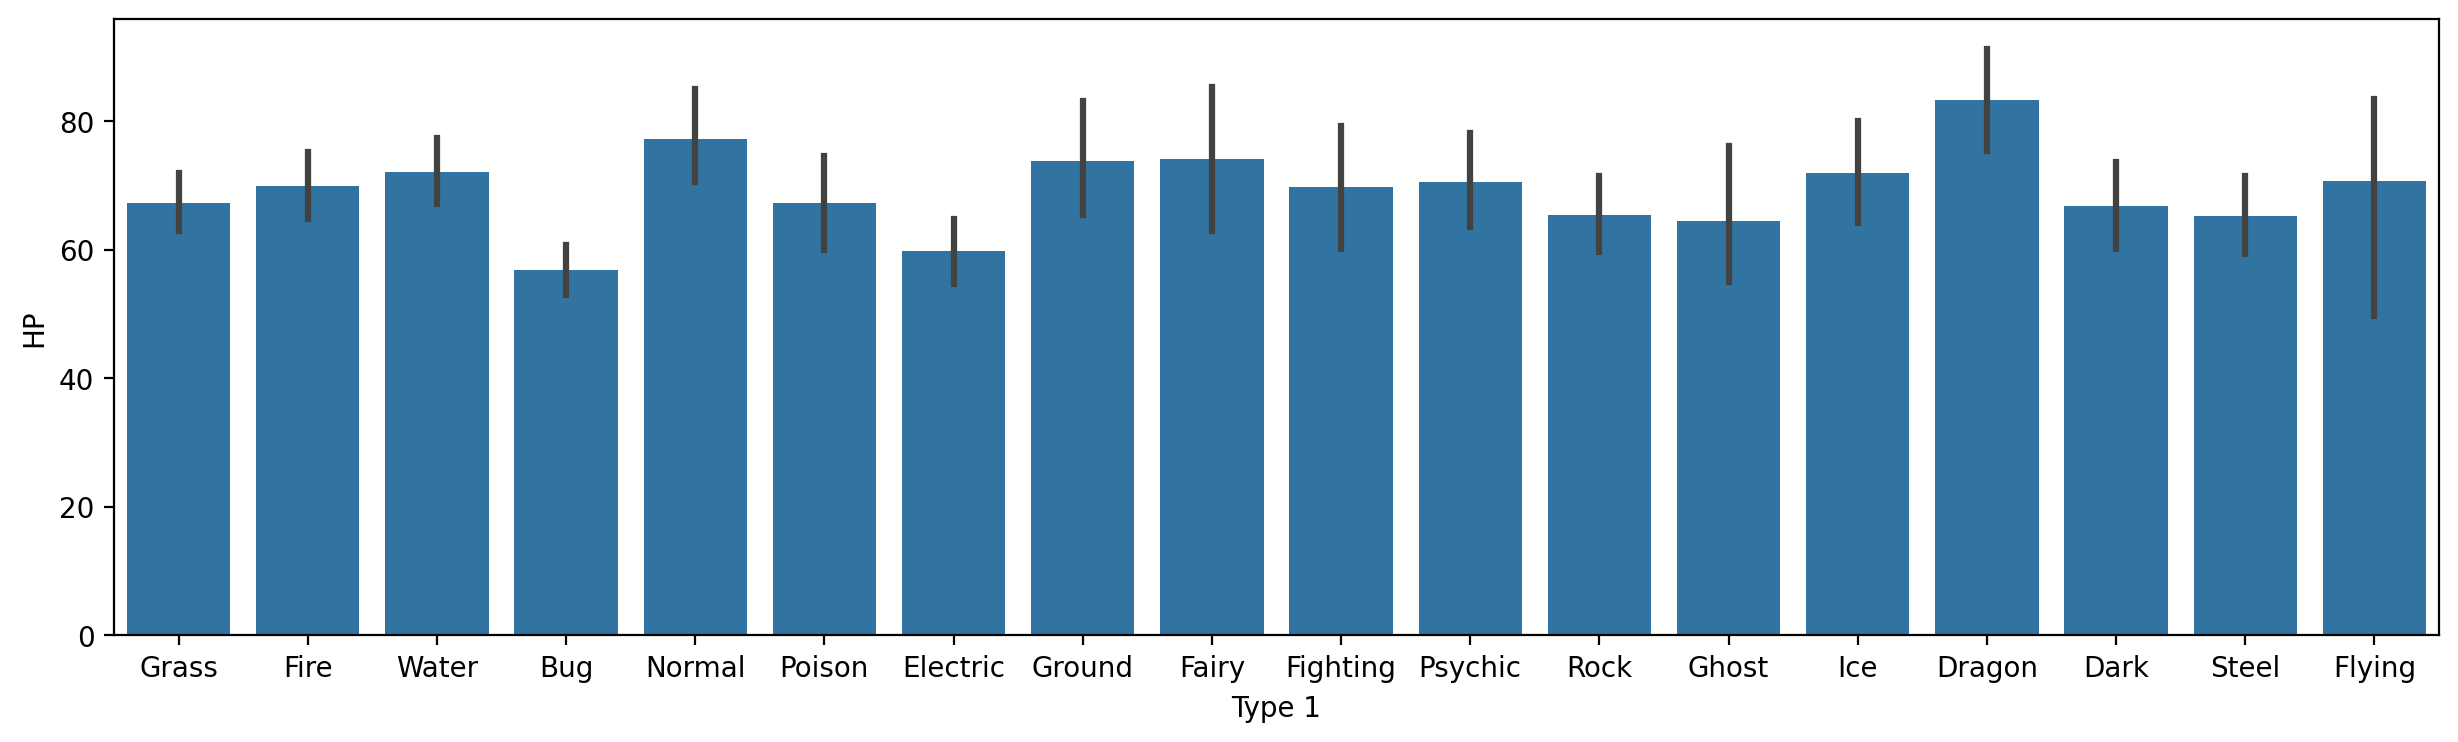

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "HP");

#### Modifying `hue`

As with `scatterplot` and `lineplot`, we can change the `hue` to give further granularity.

- E.g., `HP` by `Type 1`, further divided by `Legendary` status.

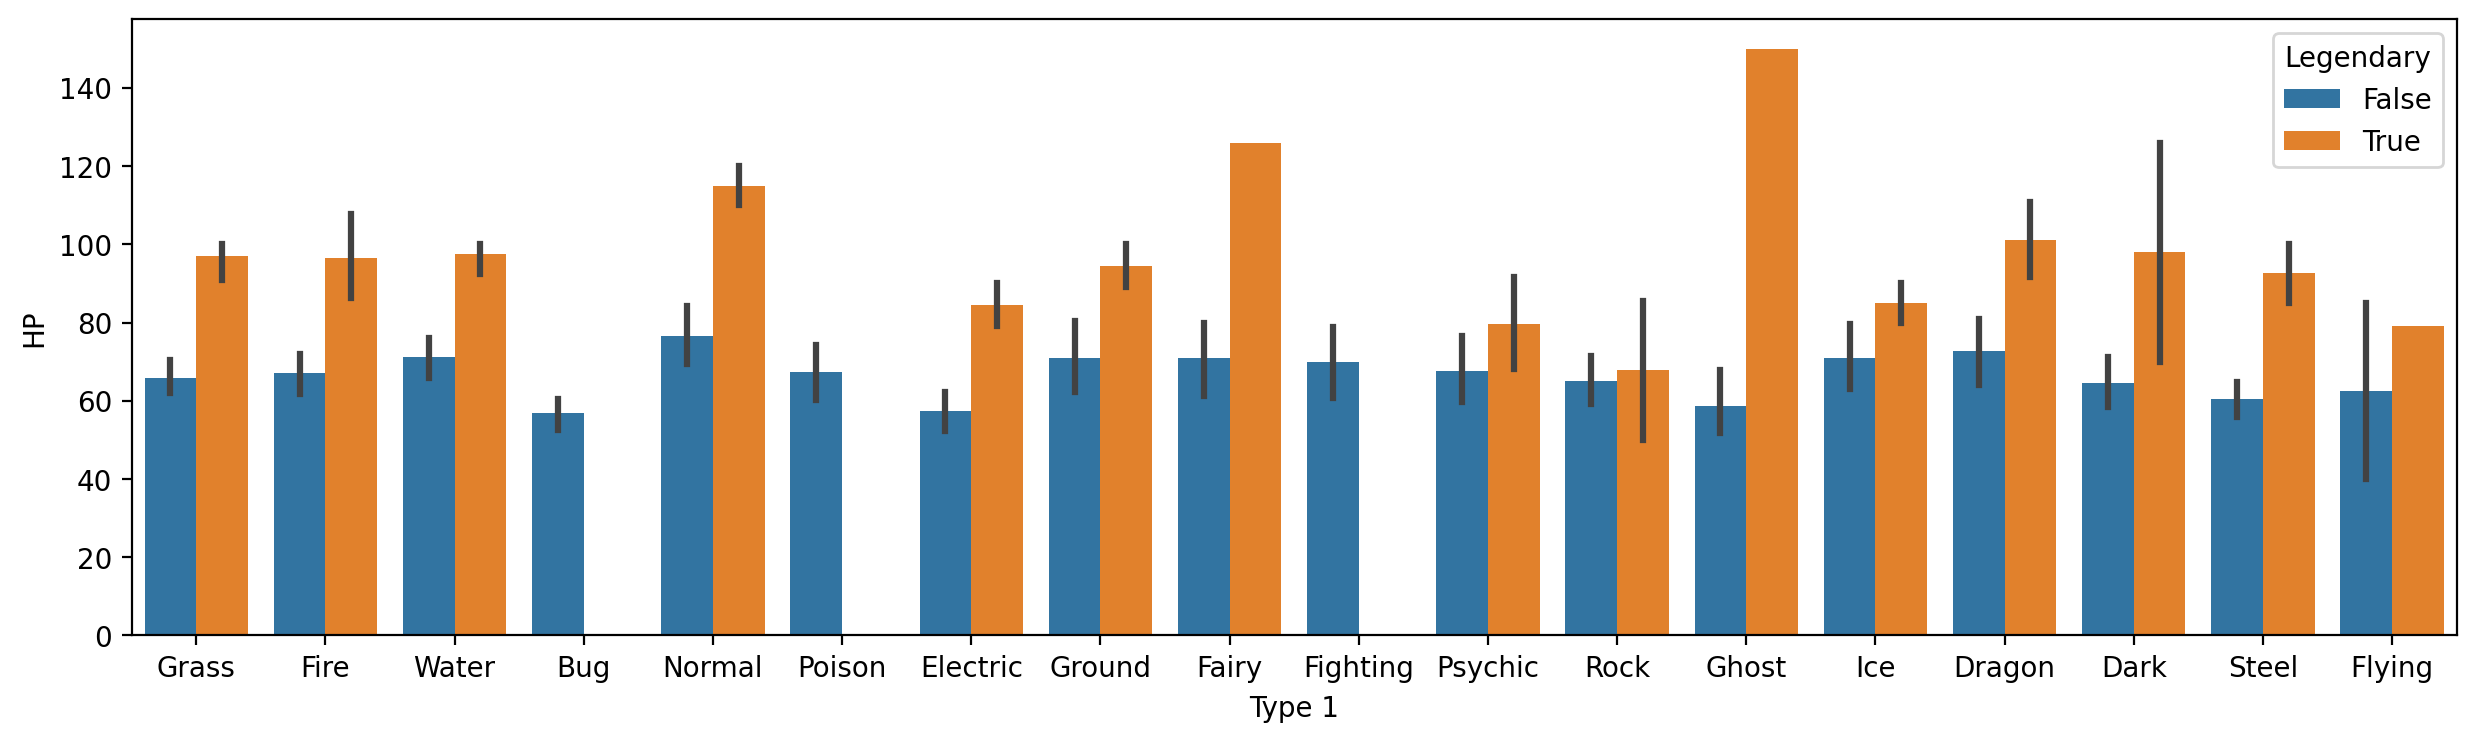

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "HP", hue = "Legendary");

### Using `catplot`

> `seaborn.catplot` is a convenient function for plotting bivariate categorical data using a range of plot types (`bar`, `box`, `strip`).

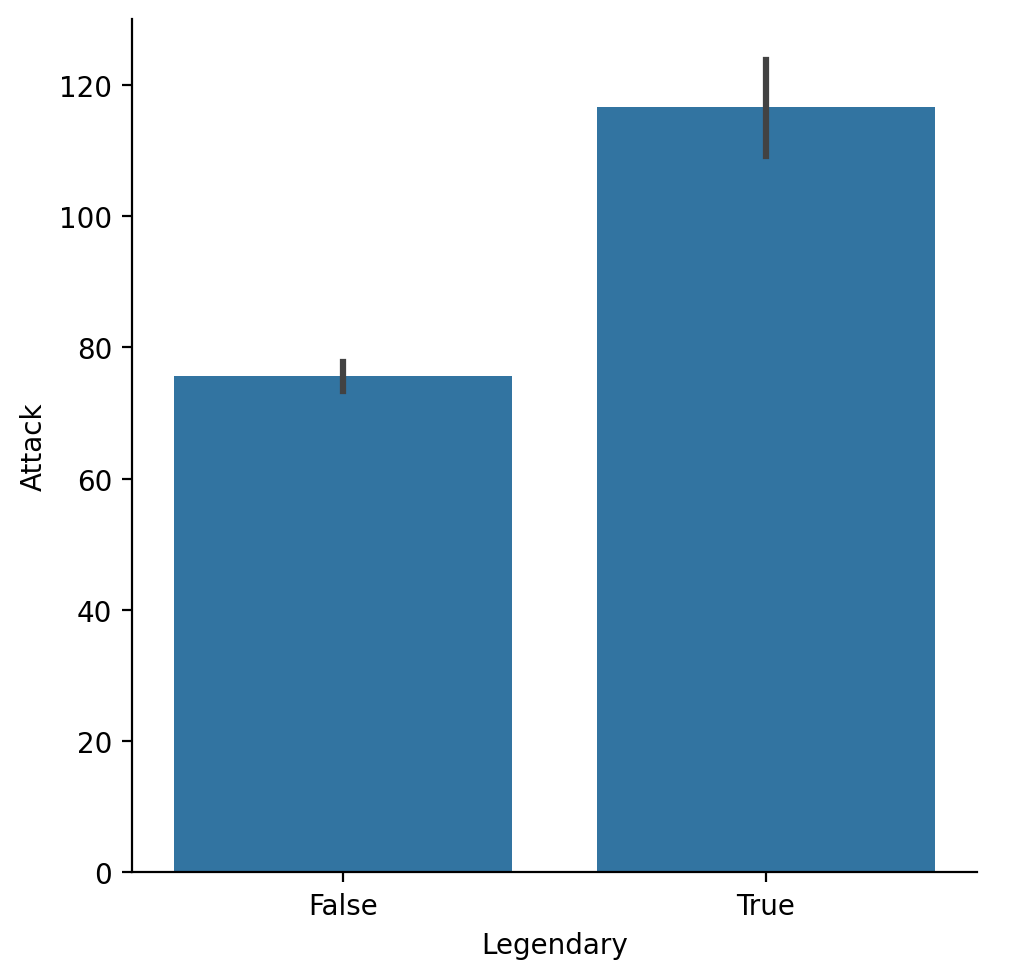

In [ ]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "bar");

#### `strip` plots

> A `strip` plot shows each individual point (like a scatterplot), divided by a **category label**.

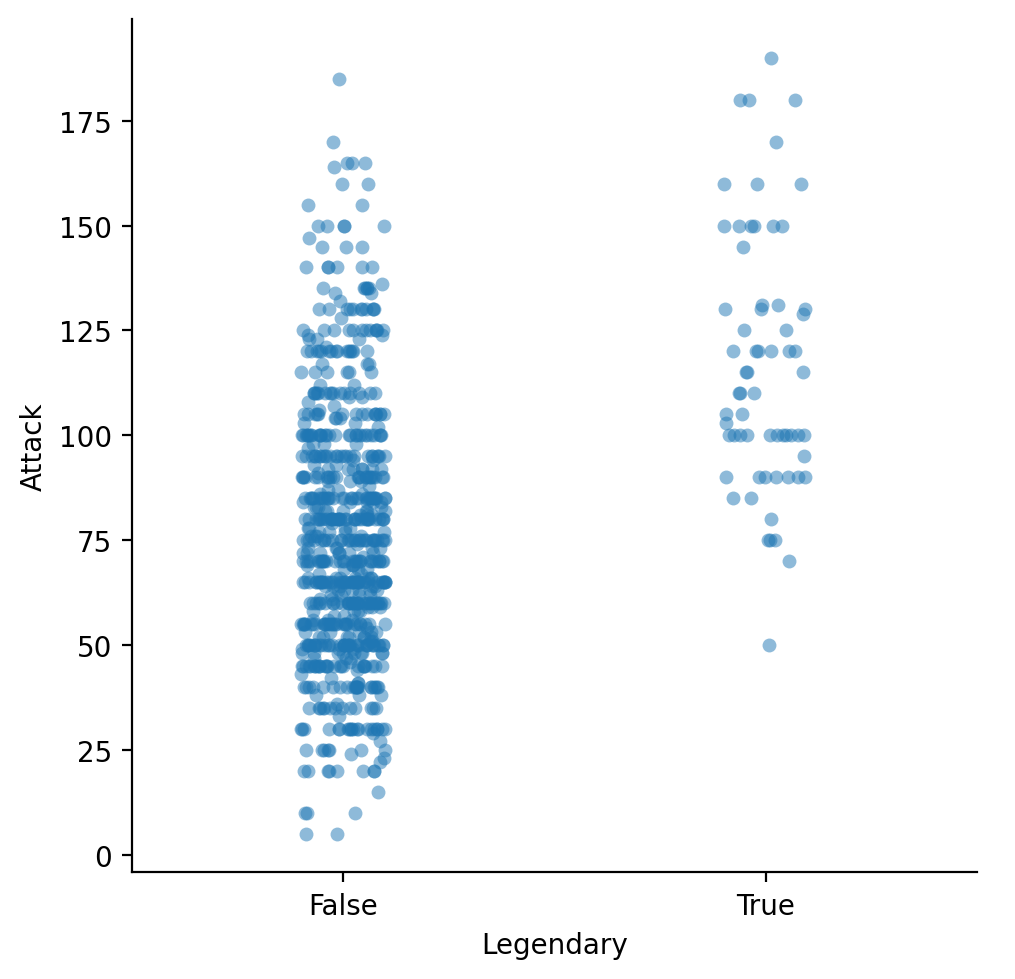

In [ ]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "strip", alpha = .5);

#### Adding a `mean` to our `strip` plot

We can plot *two graphs* at the same time, showing both the individual points and the means.

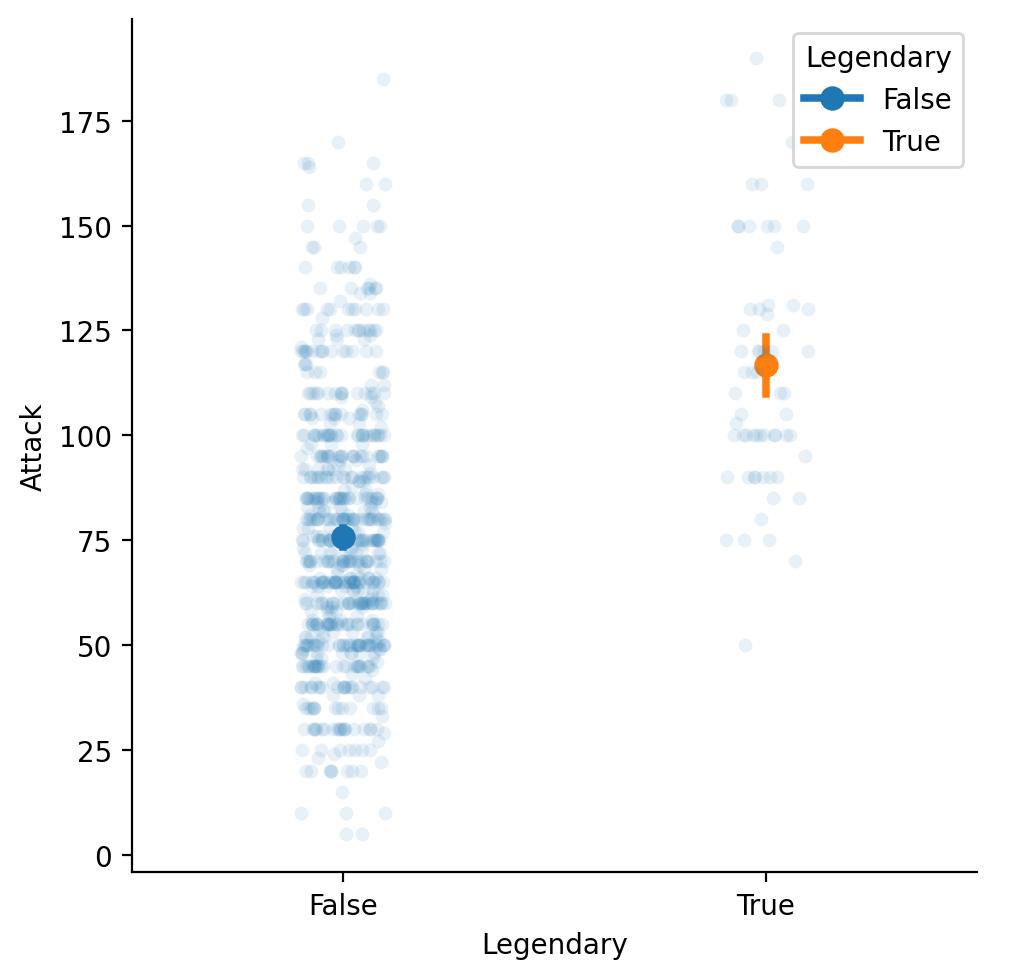

In [ ]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "strip", alpha = .1)
sns.pointplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", hue = "Legendary");

#### `box` plots

> A `box` plot shows the interquartile range (the middle 50% of the data), along with the minimum and maximum.

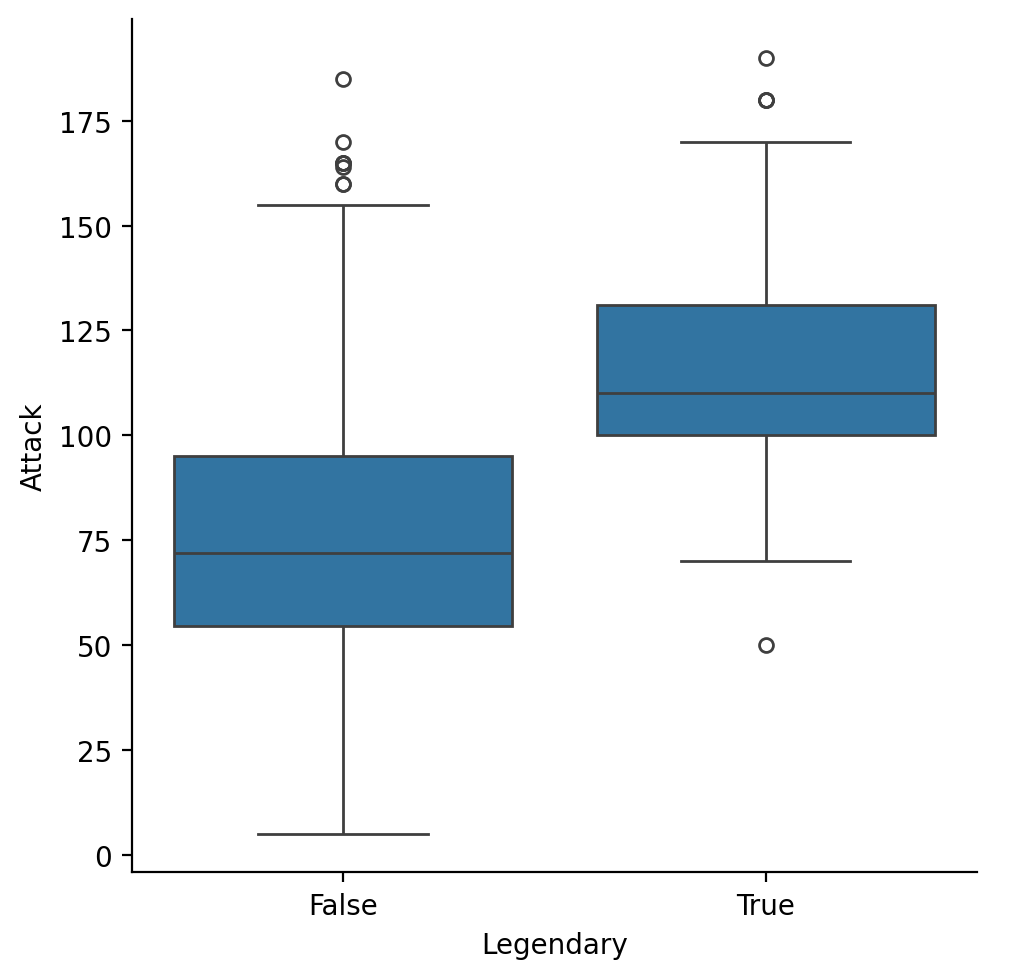

In [ ]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "box");

## Conclusion

As with our lecture on `pyplot`, this just scratches the surface.

But now, you've had an introduction to:

- The `seaborn` package.
- Plotting both **univariate** and **bivariate** data.
- Creating plots with multiple layers.